# Exploratory Data Analysis

In [32]:
pwd

'c:\\Users\\wware\\Desktop\\UWA Bootcamp\\Challenges\\project_1\\Statistics'

## Data Preparation and Dependencies Setup

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Study data files
seasonal_pollution_path = os.path.join("..","Resources", "Data", "seasonal_combined_df1_ww.csv")
monthly_pollution_path = os.path.join("..","Resources", "Data", "monthly_combined_df1_ww.csv")

# Read the data and the results

seasonal_pollution_df = pd.read_csv(seasonal_pollution_path)
monthly_pollution_df = pd.read_csv(monthly_pollution_path)

# Create output directory
stats_output_dir_season = 'Stats_Outputs/Season'
if not os.path.exists(stats_output_dir_season):
    os.makedirs(stats_output_dir_season)

stats_output_dir_month = 'Stats_Outputs/Month'
if not os.path.exists(stats_output_dir_month):
    os.makedirs(stats_output_dir_month)


## Seasonal EDA

In [81]:
seasonal_pollution_df.head()


,city,Hemisphere,Season,Year,Season_Year,co,no,no2,o3,so2,...,pm10,nh3,name,latitude,longitude,country,population,is_capital,is_rural,country_full
0,Aasiaat,Northern Hemisphere,Summer,2022,Summer_2022,179.718204,0.022079,0.313528,52.637019,0.220574,...,1.410569,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
1,Aasiaat,Northern Hemisphere,Autumn,2022,Autumn_2022,187.498562,0.001525,0.180261,70.555879,0.093420,...,1.397143,0.000014,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
2,Aasiaat,Northern Hemisphere,Winter,2022,Winter_2022,210.086533,0.000000,0.104167,87.908289,0.120997,...,0.630580,0.000134,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
3,Aasiaat,Northern Hemisphere,Spring,2022,Spring_2022,227.892261,0.018850,0.165229,77.791464,0.286301,...,0.755046,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
4,Aasiaat,Northern Hemisphere,Summer,2023,Summer_2023,221.827736,0.021082,0.337785,48.390688,0.218066,...,1.421771,0.000983,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat


In [82]:
dtypes = seasonal_pollution_df.dtypes
dtypes

city             object
Hemisphere       object
Season           object
Year              int64
Season_Year      object
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
name             object
latitude        float64
longitude       float64
country          object
population      float64
is_capital         bool
is_rural           bool
country_full     object
dtype: object

In [83]:
seasonal_pollution_df.describe()

,Year,co,no,no2,o3,so2,pm2_5,pm10,nh3,latitude,longitude,population
count,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3.583000e+03
mean,2022.801496,280.663335,0.553074,3.996631,50.799707,2.290710,10.914334,23.683782,1.625098,18.546498,11.149274,1.635218e+05
std,0.748330,162.313280,1.773417,6.708260,21.975908,6.806494,20.658813,55.929085,4.038999,33.077678,90.903671,5.936431e+05
min,2022.000000,136.984537,0.000000,0.005763,-1.666304,0.012097,0.500000,-6.560791,0.000000,-54.807200,-178.158000,1.000000e+01
25%,2022.000000,209.020861,0.022329,0.505223,34.793403,0.240355,1.938362,2.495681,0.071611,-8.000000,-71.735300,1.147000e+04
50%,2023.000000,234.757592,0.072113,1.324841,49.938478,0.608842,4.147857,6.664513,0.343797,22.912500,16.518900,2.508500e+04
75%,2023.000000,277.270230,0.255401,4.159782,66.840304,1.658761,9.333122,15.911112,1.320414,46.194400,88.116600,1.088600e+05
max,2024.000000,1800.546890,27.973810,55.992440,162.001292,98.496577,244.718690,633.222727,57.549971,71.626900,177.517000,7.674439e+06


In [84]:
import numpy as np

# Create a new DataFrame to keep the changes
seasonal_pollution_df1 = seasonal_pollution_df.copy()

# Replace negative values in 'o3' and 'pm10' with NaN
seasonal_pollution_df1['o3'] = seasonal_pollution_df1['o3'].apply(lambda x: np.nan if x < 0 else x)
seasonal_pollution_df1['pm10'] = seasonal_pollution_df1['pm10'].apply(lambda x: np.nan if x < 0 else x)

# Calculate the median of the 'population' column, ignoring NaN values
population_median = seasonal_pollution_df1['population'].median()

# Fill missing values in 'population' with the median
seasonal_pollution_df1['population'] = seasonal_pollution_df1['population'].fillna(population_median)

# Check changes by displaying the modified DataFrame
seasonal_pollution_df1.head()

,city,Hemisphere,Season,Year,Season_Year,co,no,no2,o3,so2,...,pm10,nh3,name,latitude,longitude,country,population,is_capital,is_rural,country_full
0,Aasiaat,Northern Hemisphere,Summer,2022,Summer_2022,179.718204,0.022079,0.313528,52.637019,0.220574,...,1.410569,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
1,Aasiaat,Northern Hemisphere,Autumn,2022,Autumn_2022,187.498562,0.001525,0.180261,70.555879,0.093420,...,1.397143,0.000014,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
2,Aasiaat,Northern Hemisphere,Winter,2022,Winter_2022,210.086533,0.000000,0.104167,87.908289,0.120997,...,0.630580,0.000134,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
3,Aasiaat,Northern Hemisphere,Spring,2022,Spring_2022,227.892261,0.018850,0.165229,77.791464,0.286301,...,0.755046,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
4,Aasiaat,Northern Hemisphere,Summer,2023,Summer_2023,221.827736,0.021082,0.337785,48.390688,0.218066,...,1.421771,0.000983,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat


In [85]:
seasonal_pollution_df1.describe()

,Year,co,no,no2,o3,so2,pm2_5,pm10,nh3,latitude,longitude,population
count,3743.000000,3743.000000,3743.000000,3743.000000,3739.000000,3743.000000,3743.000000,3548.000000,3743.000000,3743.000000,3743.000000,3.743000e+03
mean,2022.801496,280.663335,0.553074,3.996631,50.855287,2.290710,10.914334,25.196976,1.625098,18.546498,11.149274,1.576041e+05
std,0.748330,162.313280,1.773417,6.708260,21.921806,6.806494,20.658813,57.059838,4.038999,33.077678,90.903671,5.814879e+05
min,2022.000000,136.984537,0.000000,0.005763,0.319149,0.012097,0.500000,0.014435,0.000000,-54.807200,-178.158000,1.000000e+01
25%,2022.000000,209.020861,0.022329,0.505223,34.836662,0.240355,1.938362,3.118050,0.071611,-8.000000,-71.735300,1.172950e+04
50%,2023.000000,234.757592,0.072113,1.324841,49.984167,0.608842,4.147857,7.148209,0.343797,22.912500,16.518900,2.508500e+04
75%,2023.000000,277.270230,0.255401,4.159782,66.852918,1.658761,9.333122,17.279381,1.320414,46.194400,88.116600,9.278200e+04
max,2024.000000,1800.546890,27.973810,55.992440,162.001292,98.496577,244.718690,633.222727,57.549971,71.626900,177.517000,7.674439e+06


In [86]:
# Check for missing values
print(seasonal_pollution_df1.isnull().sum())

city              0
Hemisphere        0
Season            0
Year              0
Season_Year       0
co                0
no                0
no2               0
o3                4
so2               0
pm2_5             0
pm10            195
nh3               0
name              0
latitude          0
longitude         0
country          20
population        0
is_capital        0
is_rural          0
country_full      0
dtype: int64


In [87]:
# Filling missing values in 'o3' and 'pm10' with their respective medians
o3_median = seasonal_pollution_df1['o3'].median()
pm10_median = seasonal_pollution_df1['pm10'].median()
seasonal_pollution_df1['o3'] = seasonal_pollution_df1['o3'].fillna(o3_median)
seasonal_pollution_df1['pm10'] = seasonal_pollution_df1['pm10'].fillna(pm10_median)

# Handling missing 'country' values
seasonal_pollution_df1['country'] = seasonal_pollution_df1['country'].fillna("Unknown")

# Recheck for missing values
print(seasonal_pollution_df1.isnull().sum())


city            0
Hemisphere      0
Season          0
Year            0
Season_Year     0
co              0
no              0
no2             0
o3              0
so2             0
pm2_5           0
pm10            0
nh3             0
name            0
latitude        0
longitude       0
country         0
population      0
is_capital      0
is_rural        0
country_full    0
dtype: int64


In [88]:
# Checking the number of cities.
number_of_cities=seasonal_pollution_df1['city'].nunique()
number_of_cities

373

In [89]:
# Create a new column by combining 'city' and 'Season_Year' with an underscore
seasonal_pollution_df1['city_season'] = seasonal_pollution_df1['city'] + '_' + seasonal_pollution_df1['Season_Year']

# Check the first few rows to ensure the new column is correct
print(seasonal_pollution_df1[['city_season']].head())



           city_season
0  Aasiaat_Summer_2022
1  Aasiaat_Autumn_2022
2  Aasiaat_Winter_2022
3  Aasiaat_Spring_2022
4  Aasiaat_Summer_2023


In [90]:
entry_count = len(seasonal_pollution_df1['city_season'])
entry_count

3743

In [91]:
# Get the duplicate city
duplicates=seasonal_pollution_df1[seasonal_pollution_df1.duplicated(subset=["city", "Season_Year"], keep=False)]
duplicates['city'].unique()

array(['Ciudad Lazaro Cardenas', 'Las Palmas'], dtype=object)

In [92]:
duplicated_rows=seasonal_pollution_df1[seasonal_pollution_df1.duplicated(subset=['city', 'Season_Year'], keep=False)]

print('Duplicated entries: ', len(duplicated_rows))
print(duplicated_rows.head())


Duplicated entries:  40
                       city           Hemisphere  Season  Year  Season_Year  \
680  Ciudad Lazaro Cardenas  Northern Hemisphere  Summer  2022  Summer_2022   
681  Ciudad Lazaro Cardenas  Northern Hemisphere  Summer  2022  Summer_2022   
682  Ciudad Lazaro Cardenas  Northern Hemisphere  Autumn  2022  Autumn_2022   
683  Ciudad Lazaro Cardenas  Northern Hemisphere  Autumn  2022  Autumn_2022   
684  Ciudad Lazaro Cardenas  Northern Hemisphere  Winter  2022  Winter_2022   

             co        no        no2         o3        so2  ...       nh3  \
680  537.329685  1.598352  10.707319  35.977694  17.737759  ...  0.215560   
681  537.329685  1.598352  10.707319  35.977694  17.737759  ...  0.215560   
682  546.952225  1.675875  11.705678  37.859734  19.092701  ...  0.287976   
683  546.952225  1.675875  11.705678  37.859734  19.092701  ...  0.287976   
684  514.248884  0.852381  13.757188  54.377932  18.822187  ...  0.328869   

                       name  latitude 

In [93]:
# Dropping duplicates, keeping the first entry
seasonal_pollution_df2 = seasonal_pollution_df1.drop_duplicates(subset=['city', 'Season_Year'], keep='first')
seasonal_pollution_df2.head()

,city,Hemisphere,Season,Year,Season_Year,co,no,no2,o3,so2,...,nh3,name,latitude,longitude,country,population,is_capital,is_rural,country_full,city_season
0,Aasiaat,Northern Hemisphere,Summer,2022,Summer_2022,179.718204,0.022079,0.313528,52.637019,0.220574,...,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Summer_2022
1,Aasiaat,Northern Hemisphere,Autumn,2022,Autumn_2022,187.498562,0.001525,0.180261,70.555879,0.093420,...,0.000014,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Autumn_2022
2,Aasiaat,Northern Hemisphere,Winter,2022,Winter_2022,210.086533,0.000000,0.104167,87.908289,0.120997,...,0.000134,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Winter_2022
3,Aasiaat,Northern Hemisphere,Spring,2022,Spring_2022,227.892261,0.018850,0.165229,77.791464,0.286301,...,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Spring_2022
4,Aasiaat,Northern Hemisphere,Summer,2023,Summer_2023,221.827736,0.021082,0.337785,48.390688,0.218066,...,0.000983,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Summer_2023


In [94]:
# Checking the number of mice.
number_of_cities_no_dups=seasonal_pollution_df2['city'].nunique()
number_of_cities_no_dups

373

In [95]:
entry_count = len(seasonal_pollution_df2['city_season'])
entry_count

3723

# Correlation

In [96]:
# List of columns to plot
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Create a histogram for each column
for pollutant in pollutants:
    plt.figure()
    seasonal_pollution_df2[pollutant].plot(kind='hist', bins=20)
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of global {pollutant}')
    plt.savefig(f'{stats_output_dir_season}/{pollutant}_histogram_global.png')
    plt.close()


In [97]:
seasons = seasonal_pollution_df2['Season'].unique()


In [98]:
# Optional: Define a color map for different seasons for visual clarity
colors = ['blue', 'green', 'red', 'purple']  # One color for each season
season_color = {season: color for season, color in zip(seasons, colors)}

for pollutant in pollutants:
    plt.figure(figsize=(10, 6))  # Create a figure for each pollutant

    for season in seasons:
        # Select only the pollutant column for the given season
        season_data = seasonal_pollution_df2[seasonal_pollution_df2['Season'] == season][pollutant]
        plt.hist(season_data, bins=20, histtype='step', linewidth=1.5, label=season, color=season_color[season])

    plt.title(f'Global Histogram of {pollutant.capitalize()} by Season')
    plt.xlabel(f'{pollutant.capitalize()} Concentration')
    plt.ylabel('Frequency')
    plt.legend(title='Season')
    plt.grid(True)  # Optional: Turn on grid for better readability

    # Save the plot in the output directory
    plt.savefig(f'{stats_output_dir_season}/{pollutant}_global_histogram_by_season.png')
    plt.close()  # Close the plot to free up memory

In [99]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
for pollutant in pollutants:
    seasonal_pollution_df2[pollutant] = pd.to_numeric(seasonal_pollution_df2[pollutant], errors='coerce')

mean_pollution = seasonal_pollution_df2.groupby(['Season'])[pollutants].mean()
max_pollution = seasonal_pollution_df2.groupby(['Season'])[pollutants].max()
min_pollution = seasonal_pollution_df2.groupby(['Season'])[pollutants].min()
std_pollution = seasonal_pollution_df2.groupby(['Season'])[pollutants].std()

# Concatenate the statistics DataFrames along columns
stats_by_season = pd.concat([
    mean_pollution.add_suffix('_Mean'),
    max_pollution.add_suffix('_Max'),
    min_pollution.add_suffix('_Min'),
    std_pollution.add_suffix('_Std')
], axis=1)

# Transpose the DataFrame
transposed_stats_by_season = stats_by_season.T

# Sort the DataFrame by the index directly if 'Season' is the index
sorted_transposed_stats_by_season = transposed_stats_by_season.sort_index(ascending=True)

# Print the sorted DataFrame
print(sorted_transposed_stats_by_season)

Season           Autumn       Spring       Summer       Winter
co_Max      1772.905386  1584.519647  1188.859524  1800.546890
co_Mean      278.781852   276.025633   245.072885   315.990026
co_Min       138.984889   165.574386   136.984537   172.297032
co_Std       165.874353   130.497130   116.196638   208.158210
nh3_Max       26.433581    57.549971    16.232056    35.038651
nh3_Mean       1.280894     2.177450     0.978113     1.952975
nh3_Min        0.000000     0.000000     0.000000     0.000000
nh3_Std        3.056192     5.376312     2.029203     4.432253
no2_Max       43.326181    44.558658    34.676793    55.992440
no2_Mean       3.899885     3.583766     2.372448     5.840046
no2_Min        0.007333     0.007569     0.005763     0.007536
no2_Std        6.429576     5.663821     4.155236     8.911006
no_Max        13.639890    11.231832    16.145472    27.973810
no_Mean        0.562781     0.404419     0.299881     0.910550
no_Min         0.000000     0.000014     0.000000     0

C:\Users\wware\AppData\Local\Temp\ipykernel_10872\1339289966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_pollution_df2[pollutant] = pd.to_numeric(seasonal_pollution_df2[pollutant], errors='coerce')


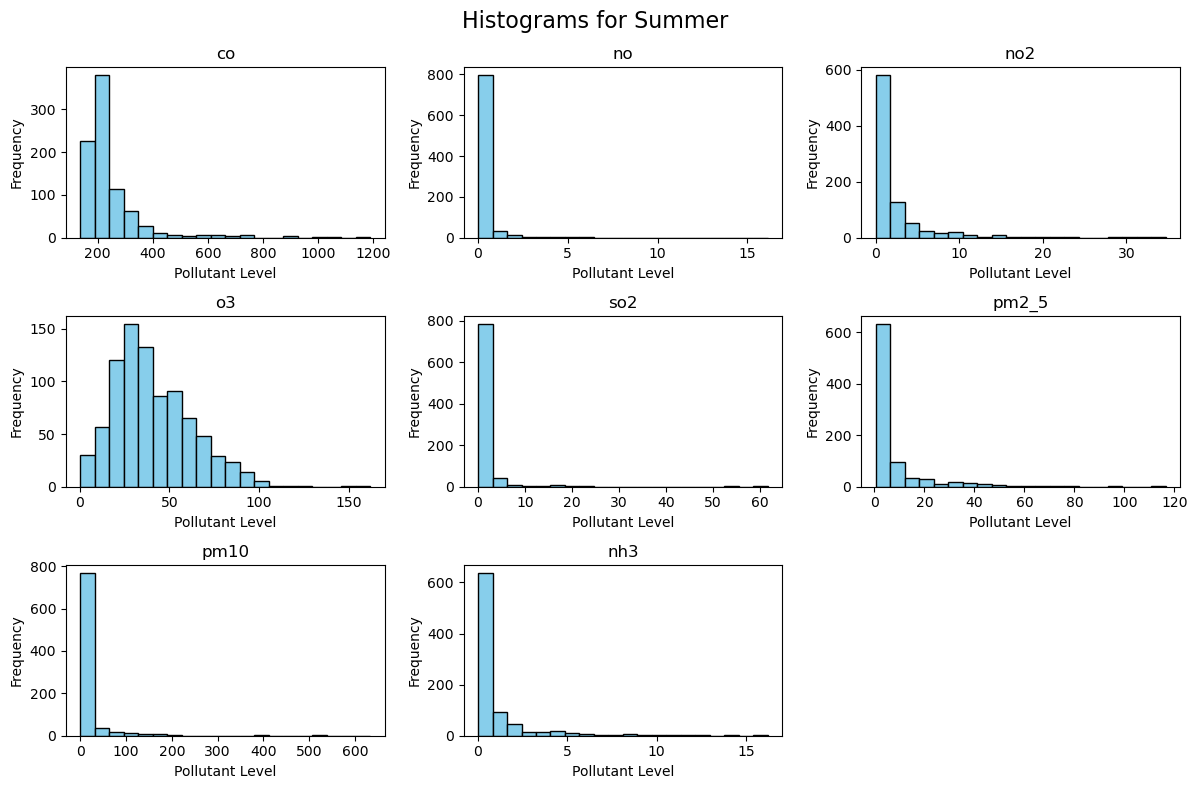

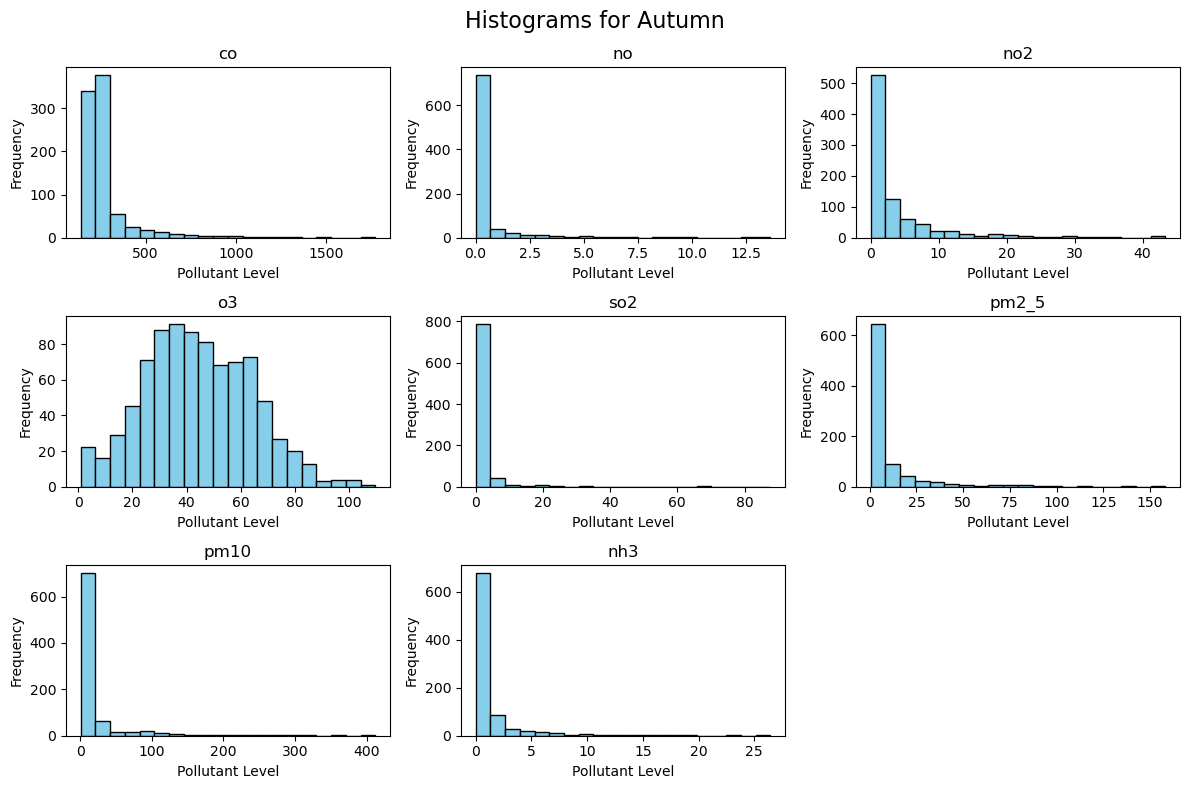

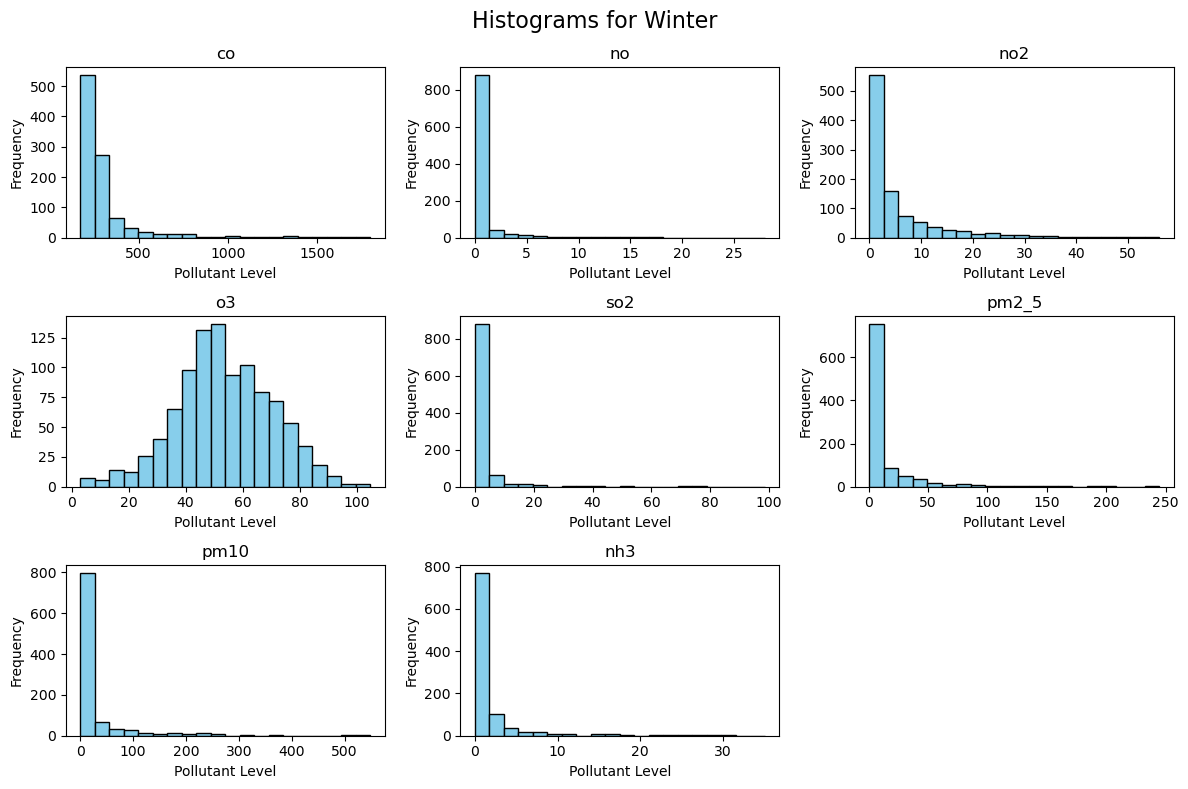

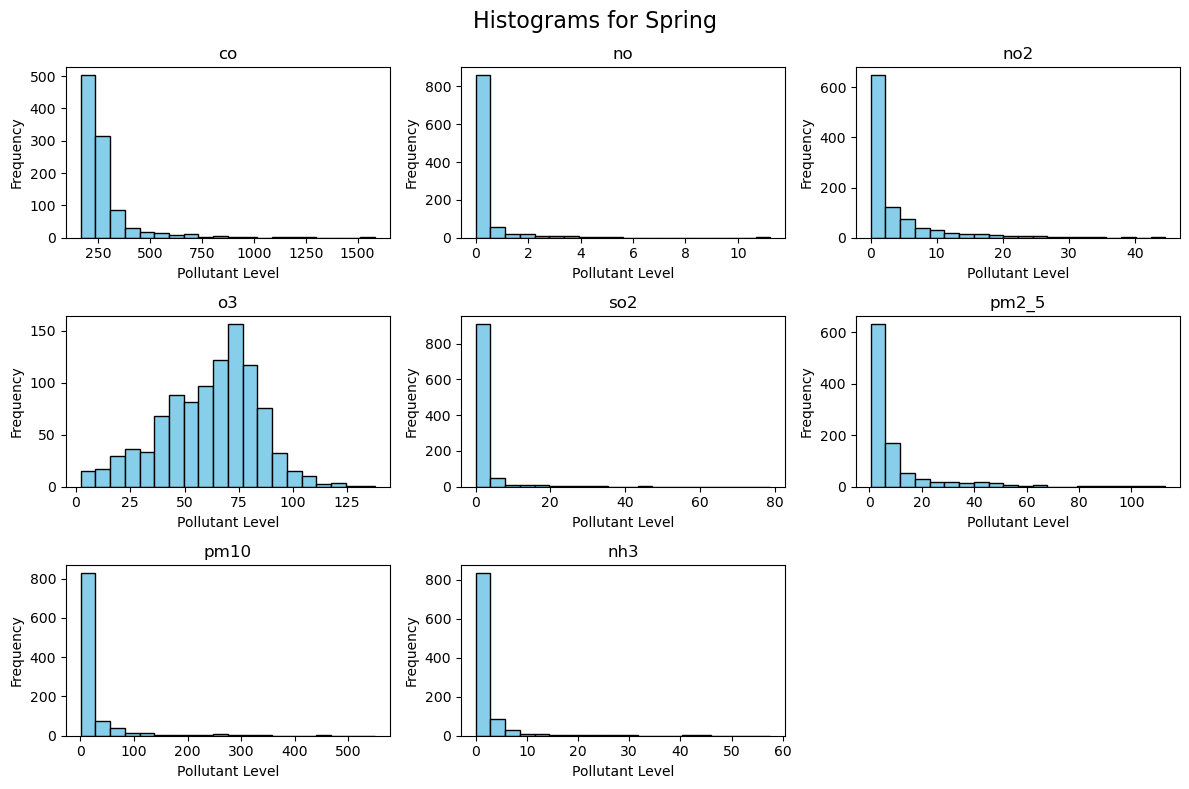

In [100]:
# Iterate over each season
for season in seasons:
    # Filter data for the current season
    season_data = seasonal_pollution_df2[seasonal_pollution_df2['Season'] == season]
    
    # Create a new figure for the current season
    plt.figure(figsize=(12, 8))
    
    # Iterate over each pollutant
    for idx, pollutant in enumerate(pollutants, start=1):
        plt.subplot(3, 3, idx)  # Create subplots for each pollutant
        plt.hist(season_data[pollutant].dropna(), bins=20, color='skyblue', edgecolor='black')  # Plot histogram
        plt.title(pollutant)  # Set title
        plt.xlabel('Pollutant Level')  # Set x-axis label
        plt.ylabel('Frequency')  # Set y-axis label
    
    # Set overall title for the season
    plt.suptitle(f'Histograms for {season}', fontsize=16)
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot

In [101]:
# IQR plots (all)

# Output file path
txt_file_path = os.path.join(stats_output_dir_season, 'IQR.txt')

# Open the output file and write to it
with open(txt_file_path, 'w') as txt_file:
    # Loop over each season
    for season in seasonal_pollution_df2['Season'].unique():
        txt_file.write(f"Season: {season}\n")
        # Filter data for the current season
        season_data = seasonal_pollution_df2[seasonal_pollution_df2['Season'] == season]

        # Calculate the IQR for each pollutant for the current season
        for pollutant in pollutants:
            if pollutant in season_data.columns:  # Check if the column exists
                clean_data = season_data[pollutant].dropna()
                quartiles = clean_data.quantile([.25, .75])
                first_quartile = quartiles[0.25]
                third_quartile = quartiles[0.75]
                iqr = third_quartile - first_quartile

                # Calculate lower and upper bounds to identify outliers
                lower_bound = first_quartile - 1.5 * iqr
                upper_bound = third_quartile + 1.5 * iqr
                outliers = clean_data[(clean_data < lower_bound) | (clean_data > upper_bound)]

                txt_file.write(f"{pollutant.capitalize()} IQR: {iqr:.2f}\n")
                txt_file.write(f"Values below {lower_bound:.2f} or above {upper_bound:.2f} could be outliers.\n")

                # Identify and report potential outliers
                if not outliers.empty:
                    txt_file.write(f"Potential outliers: {outliers.values}\n")
                else:
                    txt_file.write("No potential outliers detected.\n")
                txt_file.write("================================================================================\n")

        txt_file.write("\n")  # Add a newline for separation between seasons
    



In [102]:
# Outliers column

seasonal_pollution_df3 = seasonal_pollution_df2.copy()

# Function to identify outliers
def identify_outliers(data):
    quartiles = data.quantile([0.25, 0.75])
    first_quartile = quartiles[0.25]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    lower_bound = first_quartile - 1.5 * iqr
    upper_bound = third_quartile + 1.5 * iqr
    return data[(data < lower_bound) | (data > upper_bound)]

# Iterate over each season and pollutant
for season in seasonal_pollution_df3['Season'].unique():
    season_data = seasonal_pollution_df3[seasonal_pollution_df3['Season'] == season]

    for pollutant in pollutants:
        if pollutant in season_data.columns:
            clean_data = season_data[pollutant].dropna()
            outliers = identify_outliers(clean_data)

            # Store outliers in the new column
            outlier_indices = outliers.index.intersection(seasonal_pollution_df3.index)
            seasonal_pollution_df3.loc[outlier_indices, f'{pollutant}_Outliers'] = outliers.values

seasonal_pollution_df3.head()


,city,Hemisphere,Season,Year,Season_Year,co,no,no2,o3,so2,...,country_full,city_season,co_Outliers,no_Outliers,no2_Outliers,o3_Outliers,so2_Outliers,pm2_5_Outliers,pm10_Outliers,nh3_Outliers
0,Aasiaat,Northern Hemisphere,Summer,2022,Summer_2022,179.718204,0.022079,0.313528,52.637019,0.220574,...,Kalaallit Nunaat,Aasiaat_Summer_2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aasiaat,Northern Hemisphere,Autumn,2022,Autumn_2022,187.498562,0.001525,0.180261,70.555879,0.093420,...,Kalaallit Nunaat,Aasiaat_Autumn_2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aasiaat,Northern Hemisphere,Winter,2022,Winter_2022,210.086533,0.000000,0.104167,87.908289,0.120997,...,Kalaallit Nunaat,Aasiaat_Winter_2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aasiaat,Northern Hemisphere,Spring,2022,Spring_2022,227.892261,0.018850,0.165229,77.791464,0.286301,...,Kalaallit Nunaat,Aasiaat_Spring_2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aasiaat,Northern Hemisphere,Summer,2023,Summer_2023,221.827736,0.021082,0.337785,48.390688,0.218066,...,Kalaallit Nunaat,Aasiaat_Summer_2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
co_outliers_unique = seasonal_pollution_df3['co_Outliers'].unique()

print(co_outliers_unique)

[          nan  765.6029213   970.50610348 1039.40549107  995.33239216
  759.46423007 1017.40026217 1125.34702178  842.16102808 1000.65773305
  667.69883016  426.28239583  369.71080128  369.03714286  467.53078755
  641.7728869   456.86942708  717.32695549  403.08154762  674.69548729
  498.42251613  528.13380037  610.98241071  514.49831461  623.55558239
  429.33532967  480.38536017  466.9941147   433.63881629  468.92213277
  460.31548148  858.48944139 1312.55404762  542.68781699  504.97192308
  781.6750515  1170.01652462  795.93129579 1134.97147599  724.06416487
  417.08960648  434.25697344  512.78345238  440.41219608  356.70477564
  587.44448502  488.1051089   539.30126374  557.28851304  679.62936012
  884.97784314  830.50271296  861.93154762  638.72442235  794.25011447
  672.81401099  734.1062642   660.03579096  785.99546953  412.22807843
  466.17896732  465.25443519  362.62410511  412.16746795  454.95578804
  380.7457397   380.42680761  375.65542484  402.1946875   449.86671875
  495.

In [104]:
co_outliers_count = seasonal_pollution_df3['co_Outliers'].count()

print(co_outliers_count)

405


In [105]:
seasonal_pollution_df3.describe()

,Year,co,no,no2,o3,so2,pm2_5,pm10,nh3,latitude,longitude,population,co_Outliers,no_Outliers,no2_Outliers,o3_Outliers,so2_Outliers,pm2_5_Outliers,pm10_Outliers,nh3_Outliers
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,405.000000,545.000000,424.000000,23.000000,420.000000,509.000000,532.000000,454.000000
mean,2022.801504,280.247533,0.552842,3.983101,50.765806,2.253096,10.902816,24.236845,1.632771,18.522350,11.525105,1.572175e+05,641.763723,3.158789,18.598165,74.266235,13.336269,49.586489,122.026741,9.327652
std,0.748330,162.227360,1.777625,6.711727,21.881272,6.776302,20.708100,55.831042,4.048457,33.162688,90.946836,5.829199e+05,281.371416,3.679677,10.039936,58.107896,16.192533,35.715553,101.712986,7.952123
min,2022.000000,136.984537,0.000000,0.005763,0.319149,0.012097,0.500000,0.014435,0.000000,-54.807200,-178.158000,1.000000e+01,356.383791,0.369546,5.582532,3.108097,2.520408,13.885097,23.997819,2.242559
25%,2022.000000,209.062004,0.022081,0.499364,34.738649,0.239432,1.924139,3.302744,0.072174,-8.000000,-71.338000,1.167600e+04,439.291025,0.952189,10.736847,7.141833,4.286476,26.888496,54.855184,4.492244
50%,2023.000000,234.748461,0.071963,1.321974,49.929856,0.603840,4.124500,7.148209,0.346773,22.912500,16.531400,2.508500e+04,546.975334,1.694682,16.289081,101.061801,6.572303,38.475666,85.276395,6.094886
75%,2023.000000,276.381055,0.252443,4.124026,66.758722,1.652818,9.171895,15.571318,1.326147,46.254200,88.116600,9.013000e+04,738.057334,3.730050,23.426204,113.847233,15.255220,57.485648,151.898078,11.119156
max,2024.000000,1800.546890,27.973810,55.992440,162.001292,98.496577,244.718690,633.222727,57.549971,71.626900,177.517000,7.674439e+06,1800.546890,27.973810,55.992440,162.001292,98.496577,244.718690,633.222727,57.549971


In [106]:
# Filter out rows containing outliers
filtered_df = seasonal_pollution_df3[
    (seasonal_pollution_df3['co_Outliers'].isnull()) &
    (seasonal_pollution_df3['no_Outliers'].isnull()) &
    (seasonal_pollution_df3['no2_Outliers'].isnull()) &
    (seasonal_pollution_df3['o3_Outliers'].isnull()) &
    (seasonal_pollution_df3['so2_Outliers'].isnull()) &
    (seasonal_pollution_df3['pm2_5_Outliers'].isnull()) &
    (seasonal_pollution_df3['pm10_Outliers'].isnull()) &
    (seasonal_pollution_df3['nh3_Outliers'].isnull())
]

# Describe the filtered DataFrame
filtered_df.describe()

,Year,co,no,no2,o3,so2,pm2_5,pm10,nh3,latitude,longitude,population,co_Outliers,no_Outliers,no2_Outliers,o3_Outliers,so2_Outliers,pm2_5_Outliers,pm10_Outliers,nh3_Outliers
count,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2.522000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2022.800952,230.430075,0.085424,1.523296,48.206661,0.671552,3.578066,6.625305,0.490444,16.241262,8.052136,5.381840e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.751589,38.897529,0.112584,1.819101,20.794755,0.755988,3.139446,6.138379,0.663235,37.021186,94.968883,1.185518e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022.000000,136.984537,0.000000,0.005763,0.943333,0.012097,0.500000,0.025374,0.000000,-54.807200,-178.158000,1.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022.000000,204.780023,0.017046,0.397124,32.776859,0.186060,1.310775,2.238946,0.044442,-16.483400,-72.691550,8.925000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023.000000,225.217706,0.044437,0.882509,47.902000,0.405809,2.725651,5.236497,0.219781,19.081250,16.531400,1.936500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023.000000,250.302776,0.107819,1.928729,63.899095,0.832092,4.792251,8.470422,0.632870,50.996350,86.183300,4.478300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,404.984308,0.877135,14.846473,110.130915,5.316509,26.141301,43.753868,3.966758,71.626900,177.517000,1.209091e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


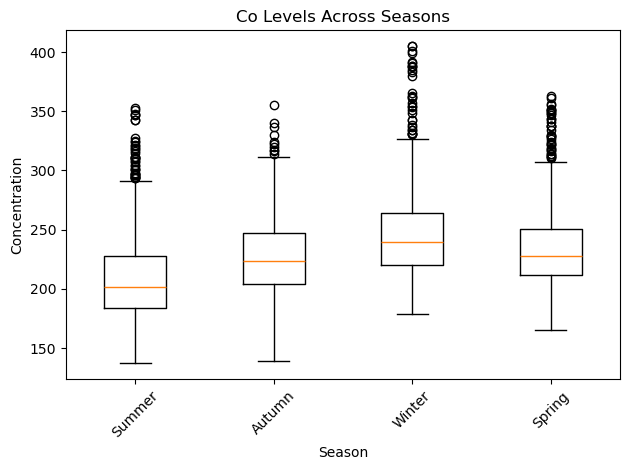

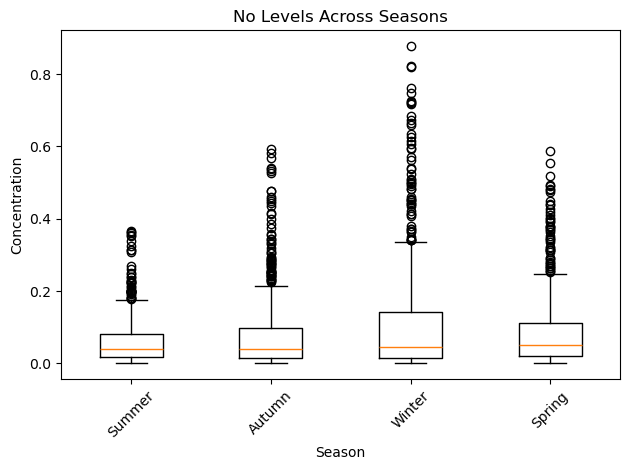

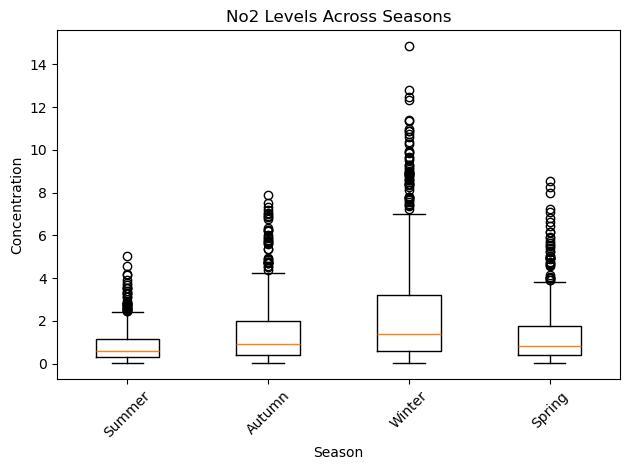

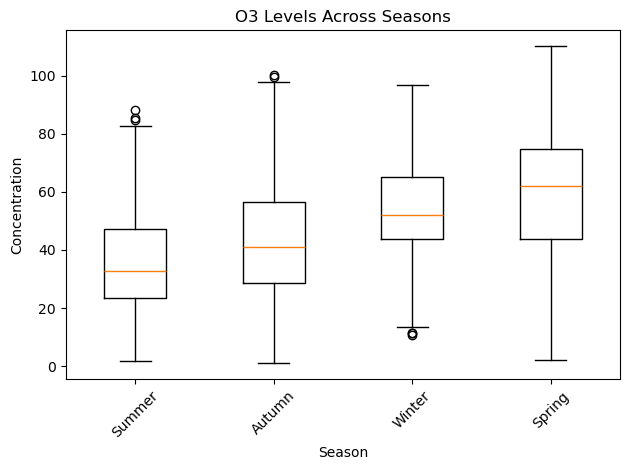

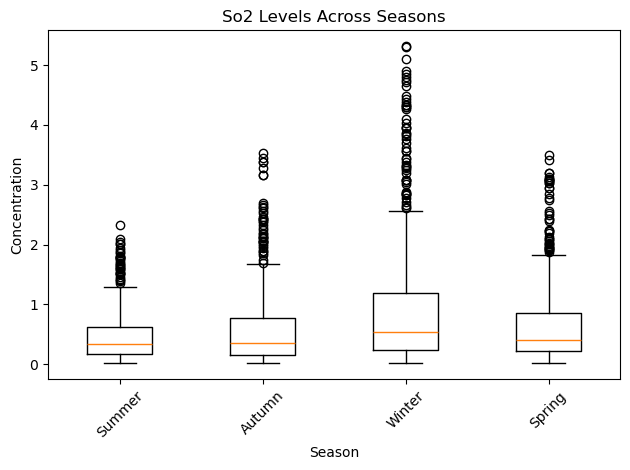

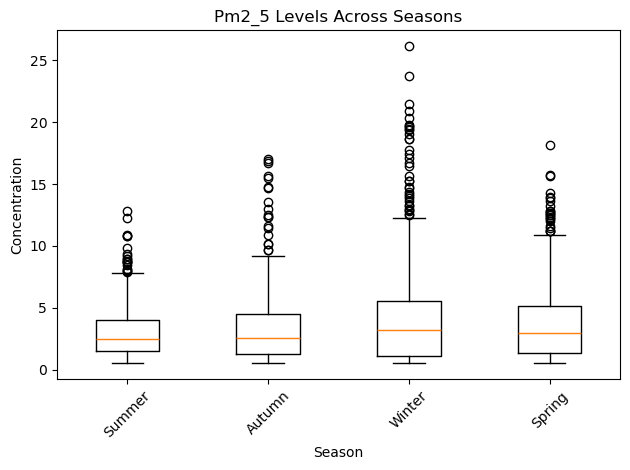

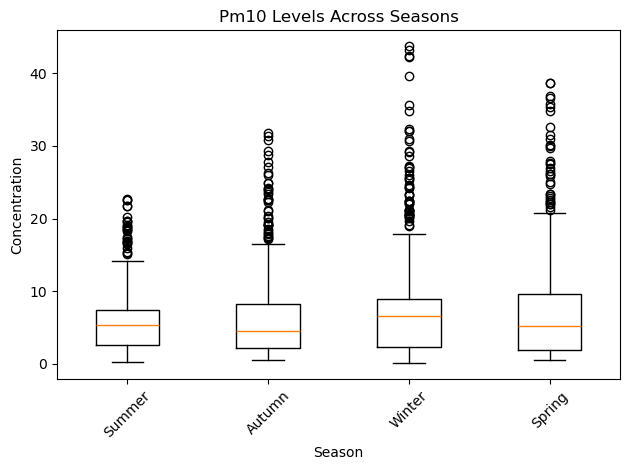

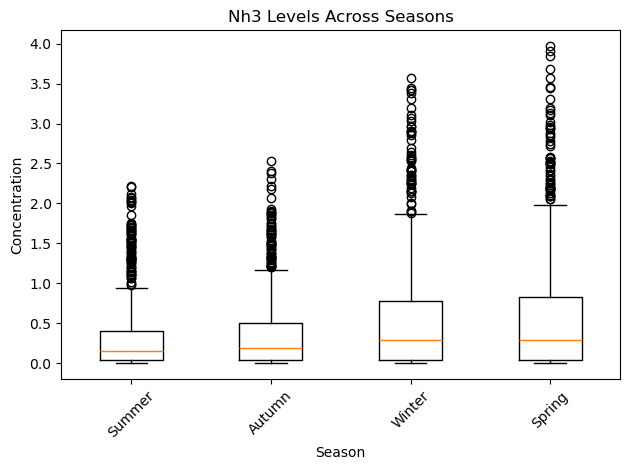

In [107]:
# Box plots (with outliers)
# Assuming 'seasonal_pollution_df', 'seasons', and 'pollutants' are predefined
# Make sure the output directory exists
os.makedirs(stats_output_dir_season, exist_ok=True)

# Prepare data for plotting
pollutant_data_by_season = {
    pollutant: [
        filtered_df[
            (filtered_df['Season'] == season) & 
            (filtered_df[pollutant].notna())
        ][pollutant] for season in seasons
    ] for pollutant in pollutants
}

# Create box plots for each pollutant
for pollutant, data in pollutant_data_by_season.items():
    fig, ax = plt.subplots()
    ax.boxplot(data, labels=seasons, showfliers=True)
    ax.set_title(f'{pollutant.capitalize()} Levels Across Seasons')
    ax.set_ylabel('Concentration')
    ax.set_xlabel('Season')

    # Setting x-axis tick labels with rotation and applying tight layout
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Define output file name for each pollutant plot and save it
    png_file_name = f'{pollutant}_box_plots.png'
    png_file_path = os.path.join(stats_output_dir_season, png_file_name)

    # Save the plot to the specified path
    fig.savefig(png_file_path)
    
    # Optionally display the plot
    plt.show()

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

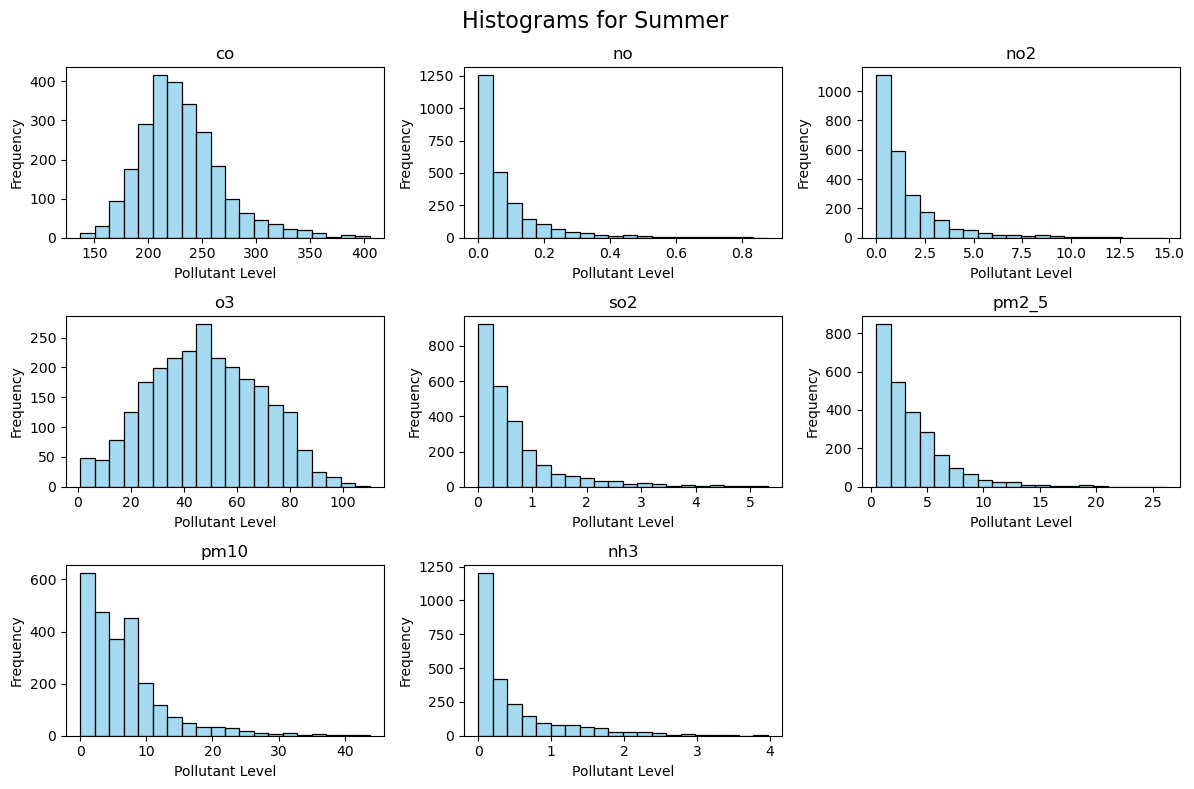

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

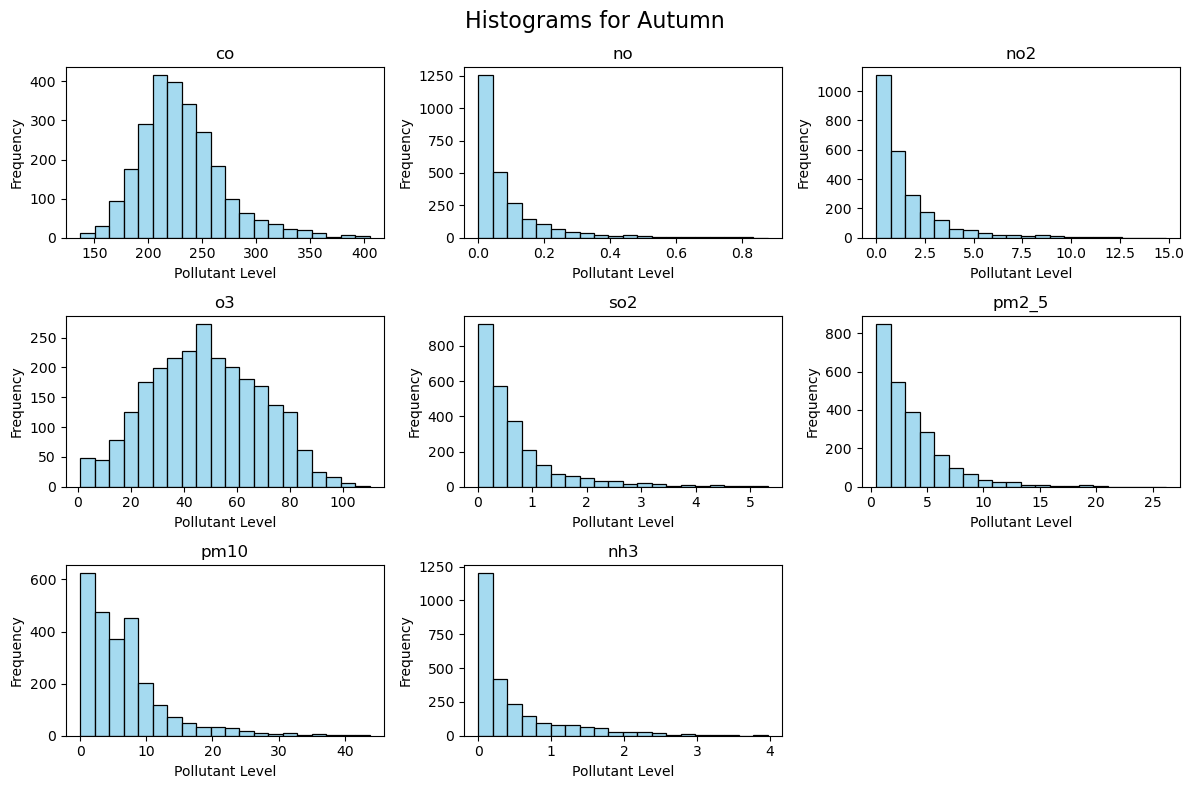

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

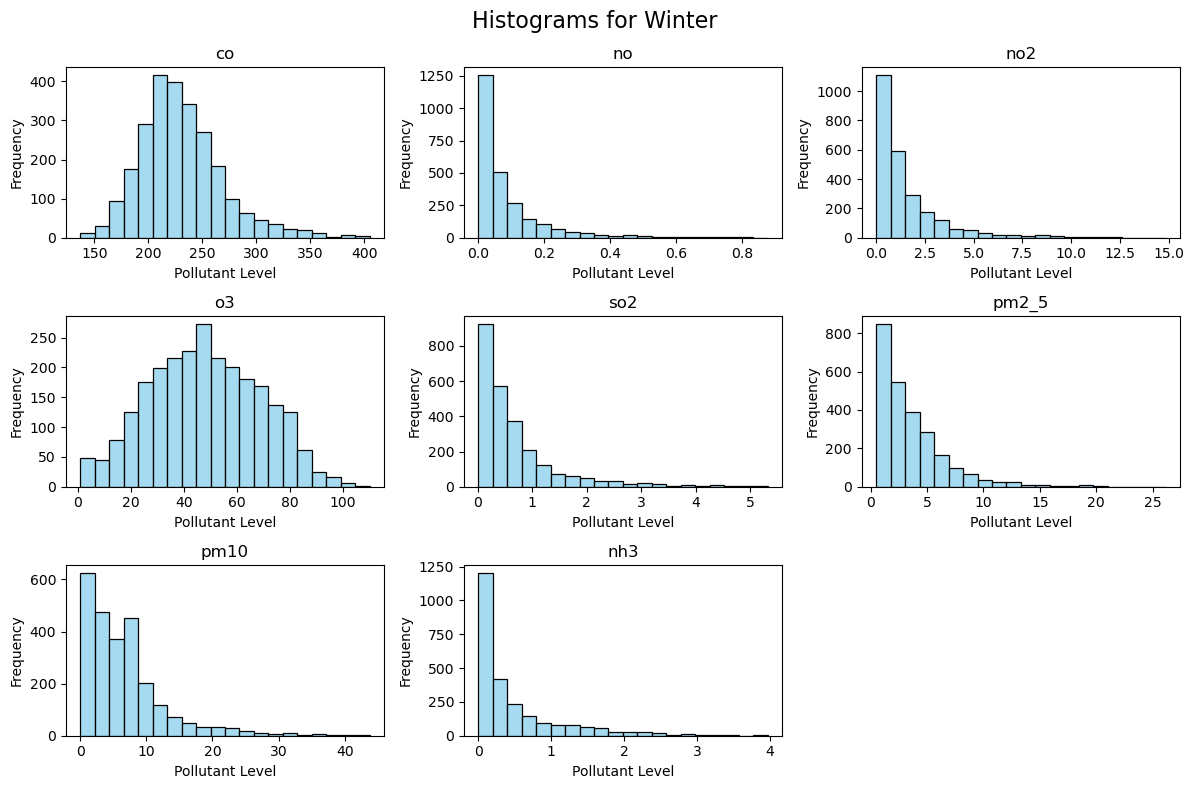

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

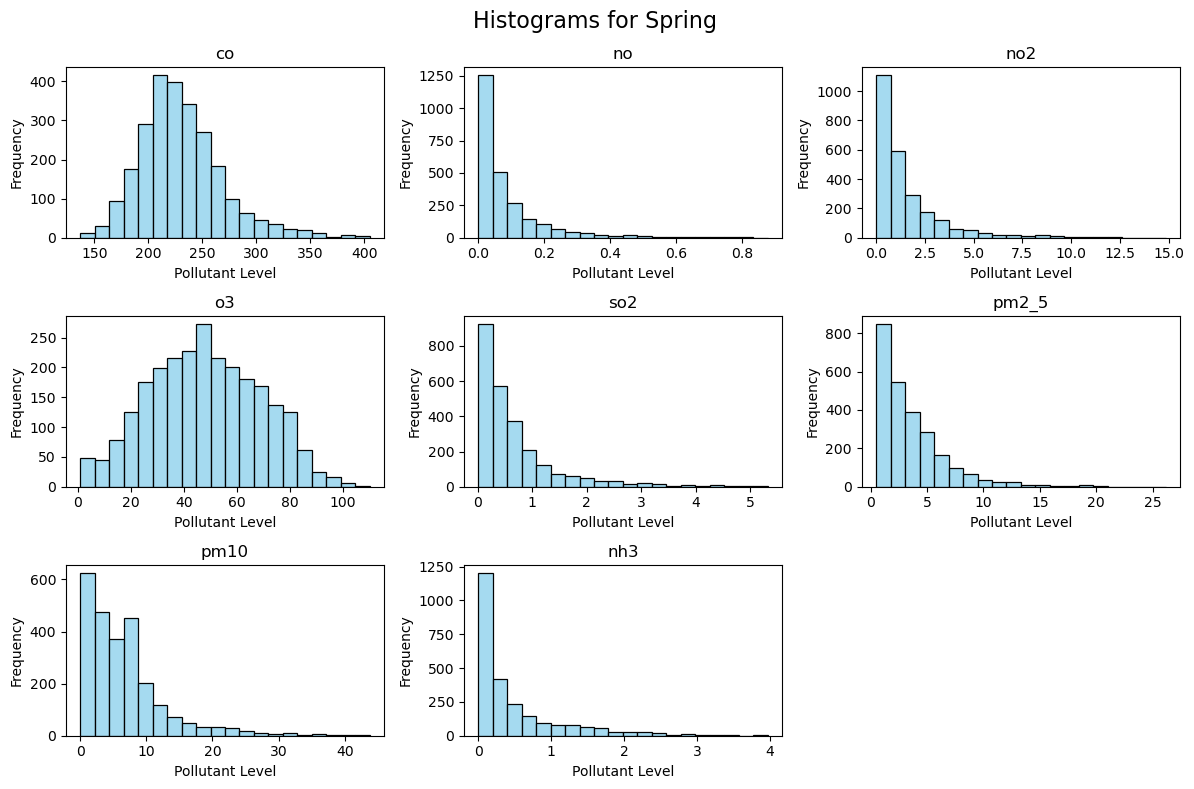

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop over each season
for season in seasons:
    # Filter data for the current season
    season_data = filtered_df[filtered_df['Season'] == season]

    # Create a figure for the current season
    plt.figure(figsize=(12, 8))
    
    # Iterate over each pollutant
    for idx, pollutant in enumerate(pollutants, start=1):
        plt.subplot(3, 3, idx)  # Create subplots for each pollutant
        sns.histplot(filtered_df[pollutant].dropna(), bins=20, color='skyblue', edgecolor='black')  # Plot histogram
        plt.title(pollutant)  # Set title
        plt.xlabel('Pollutant Level')  # Set x-axis label
        plt.ylabel('Frequency')  # Set y-axis label
    
    # Set overall title for the season
    plt.suptitle(f'Histograms for {season}', fontsize=16)
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot


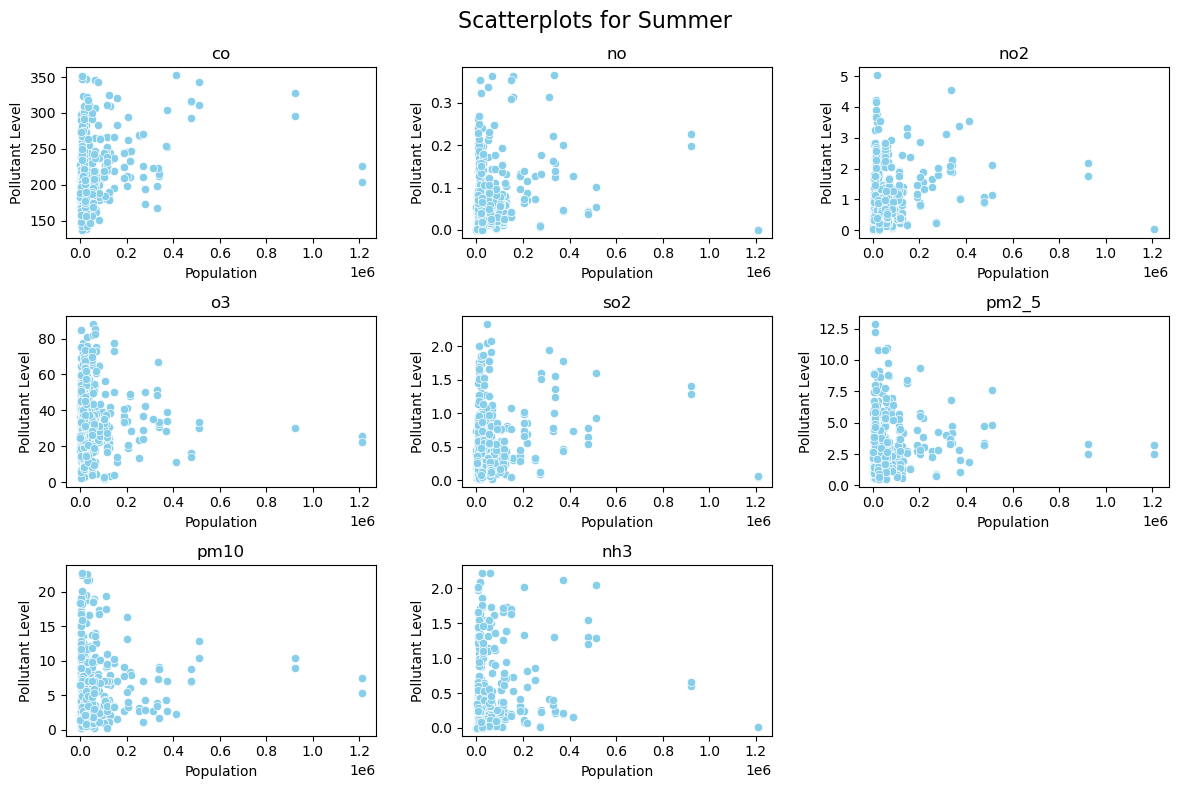

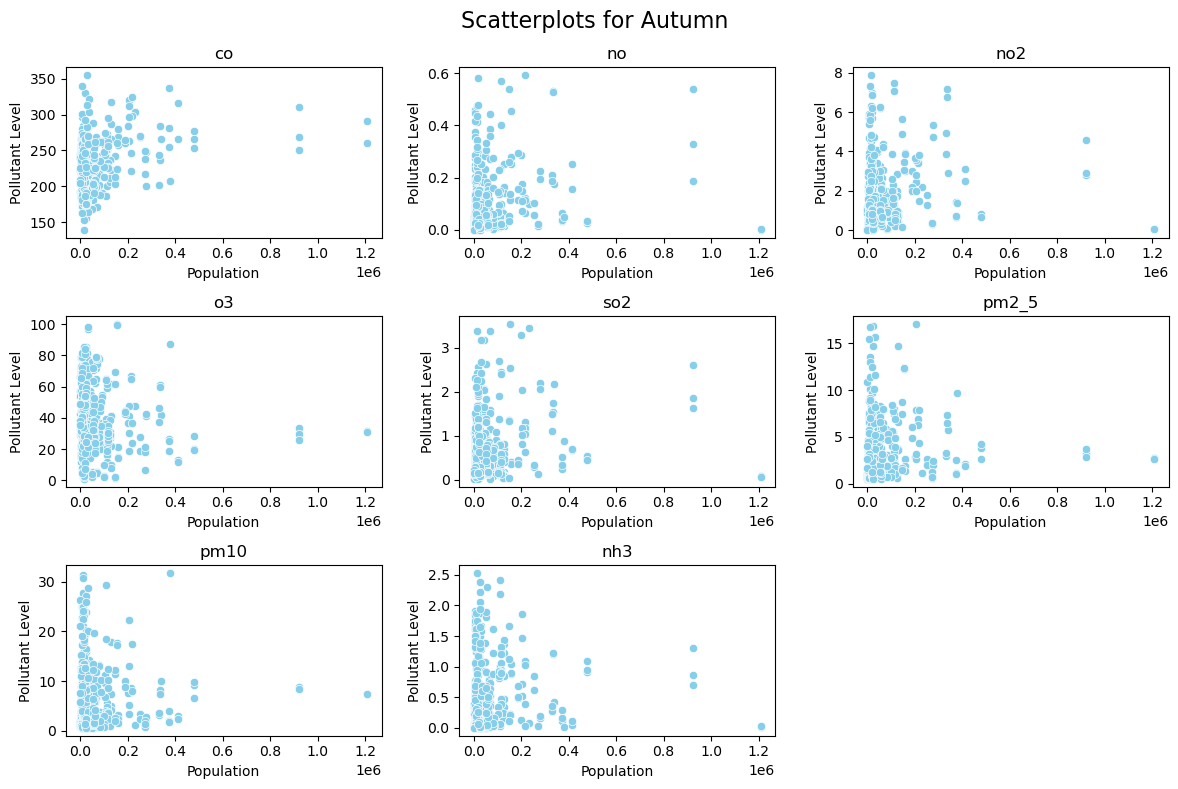

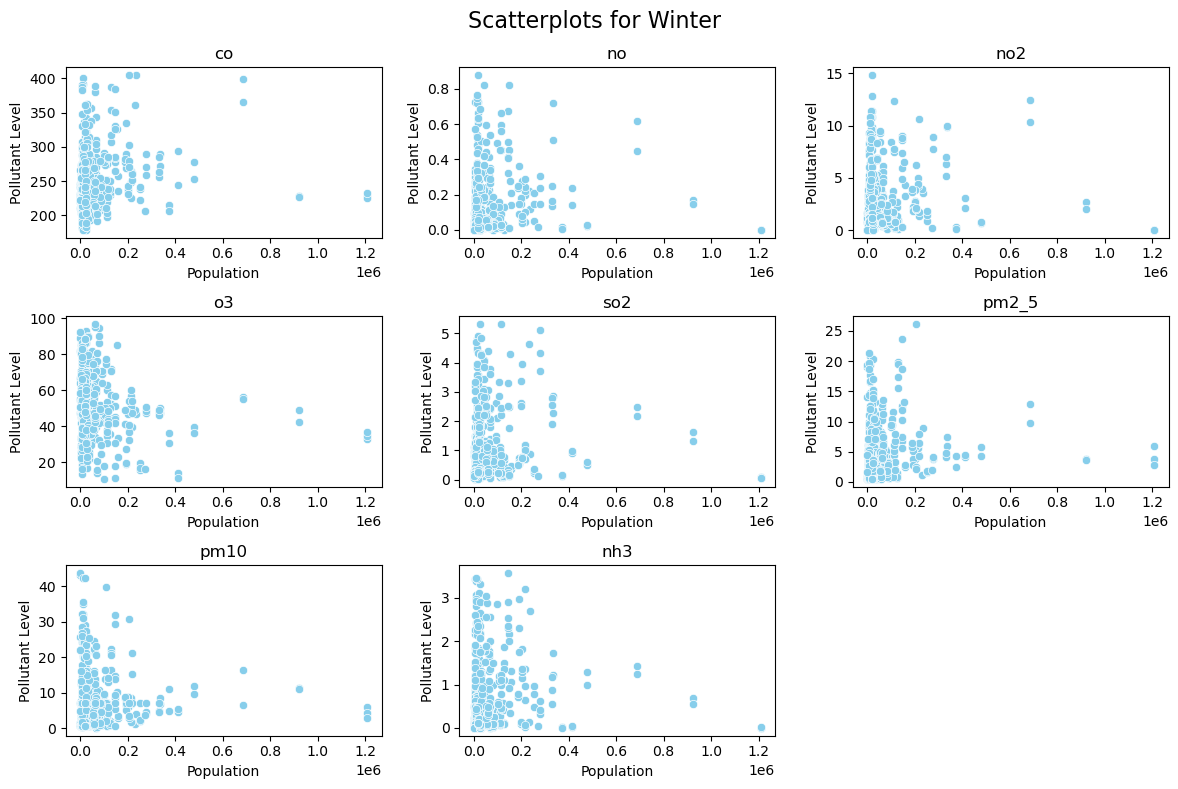

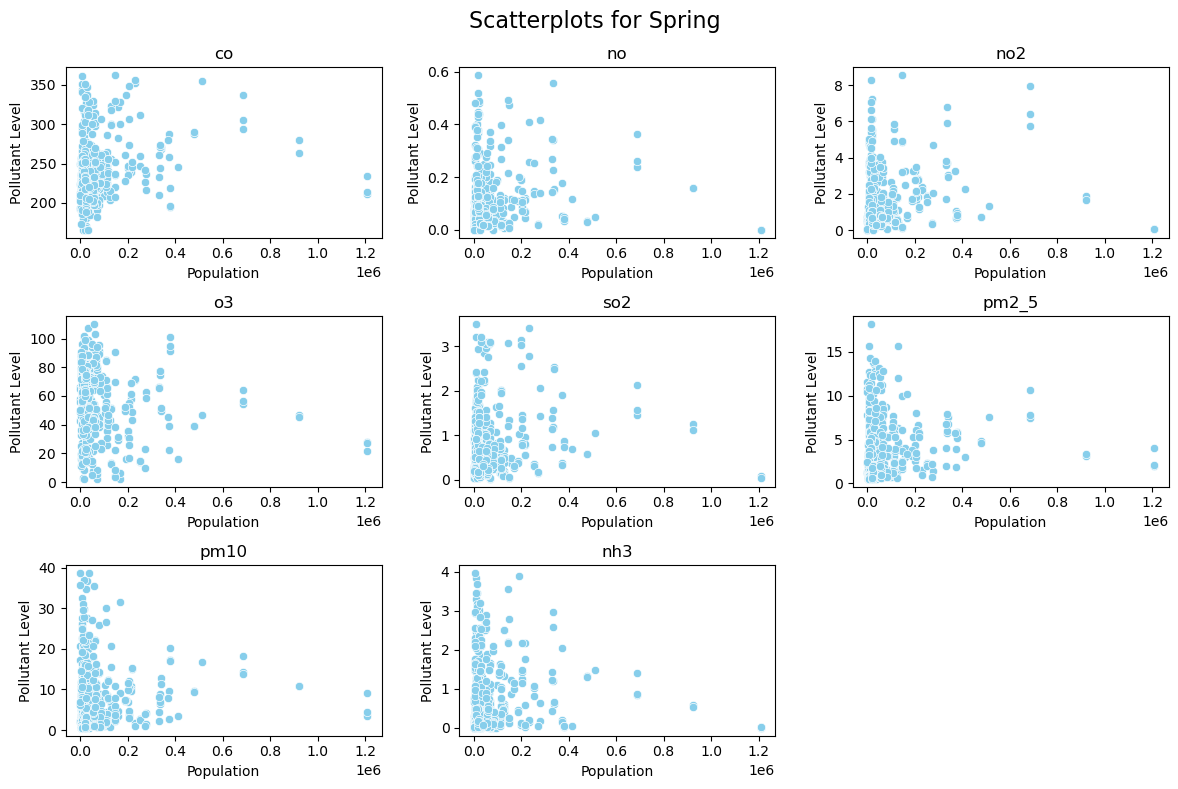

In [109]:
# Scatter plots (without outliers)

import seaborn as sns
import matplotlib.pyplot as plt

# Loop over each season
for season in seasons:
    # Filter data for the current season
    season_data = filtered_df[filtered_df['Season'] == season]

    # Create a figure for the current season
    plt.figure(figsize=(12, 8))
    
    # Iterate over each pollutant
    for idx, pollutant in enumerate(pollutants, start=1):
        plt.subplot(3, 3, idx)  # Create subplots for each pollutant
        sns.scatterplot(data=season_data, x='population', y=pollutant, color='skyblue')  # Plot histogram
        plt.title(pollutant)  # Set title
        plt.xlabel('Population')  # Set x-axis label
        plt.ylabel('Pollutant Level')  # Set y-axis label
    
    # Set overall title for the season
    plt.suptitle(f'Scatterplots for {season}', fontsize=16)
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot

{'co': 0.21030339106596224, 'no': 0.269141673429478, 'no2': 0.23207047567727979, 'o3': -0.1572480153232564, 'so2': 0.24756480673125067, 'pm2_5': 0.19649712492304505, 'pm10': 0.12672150247983202, 'nh3': 0.27184369009263704}


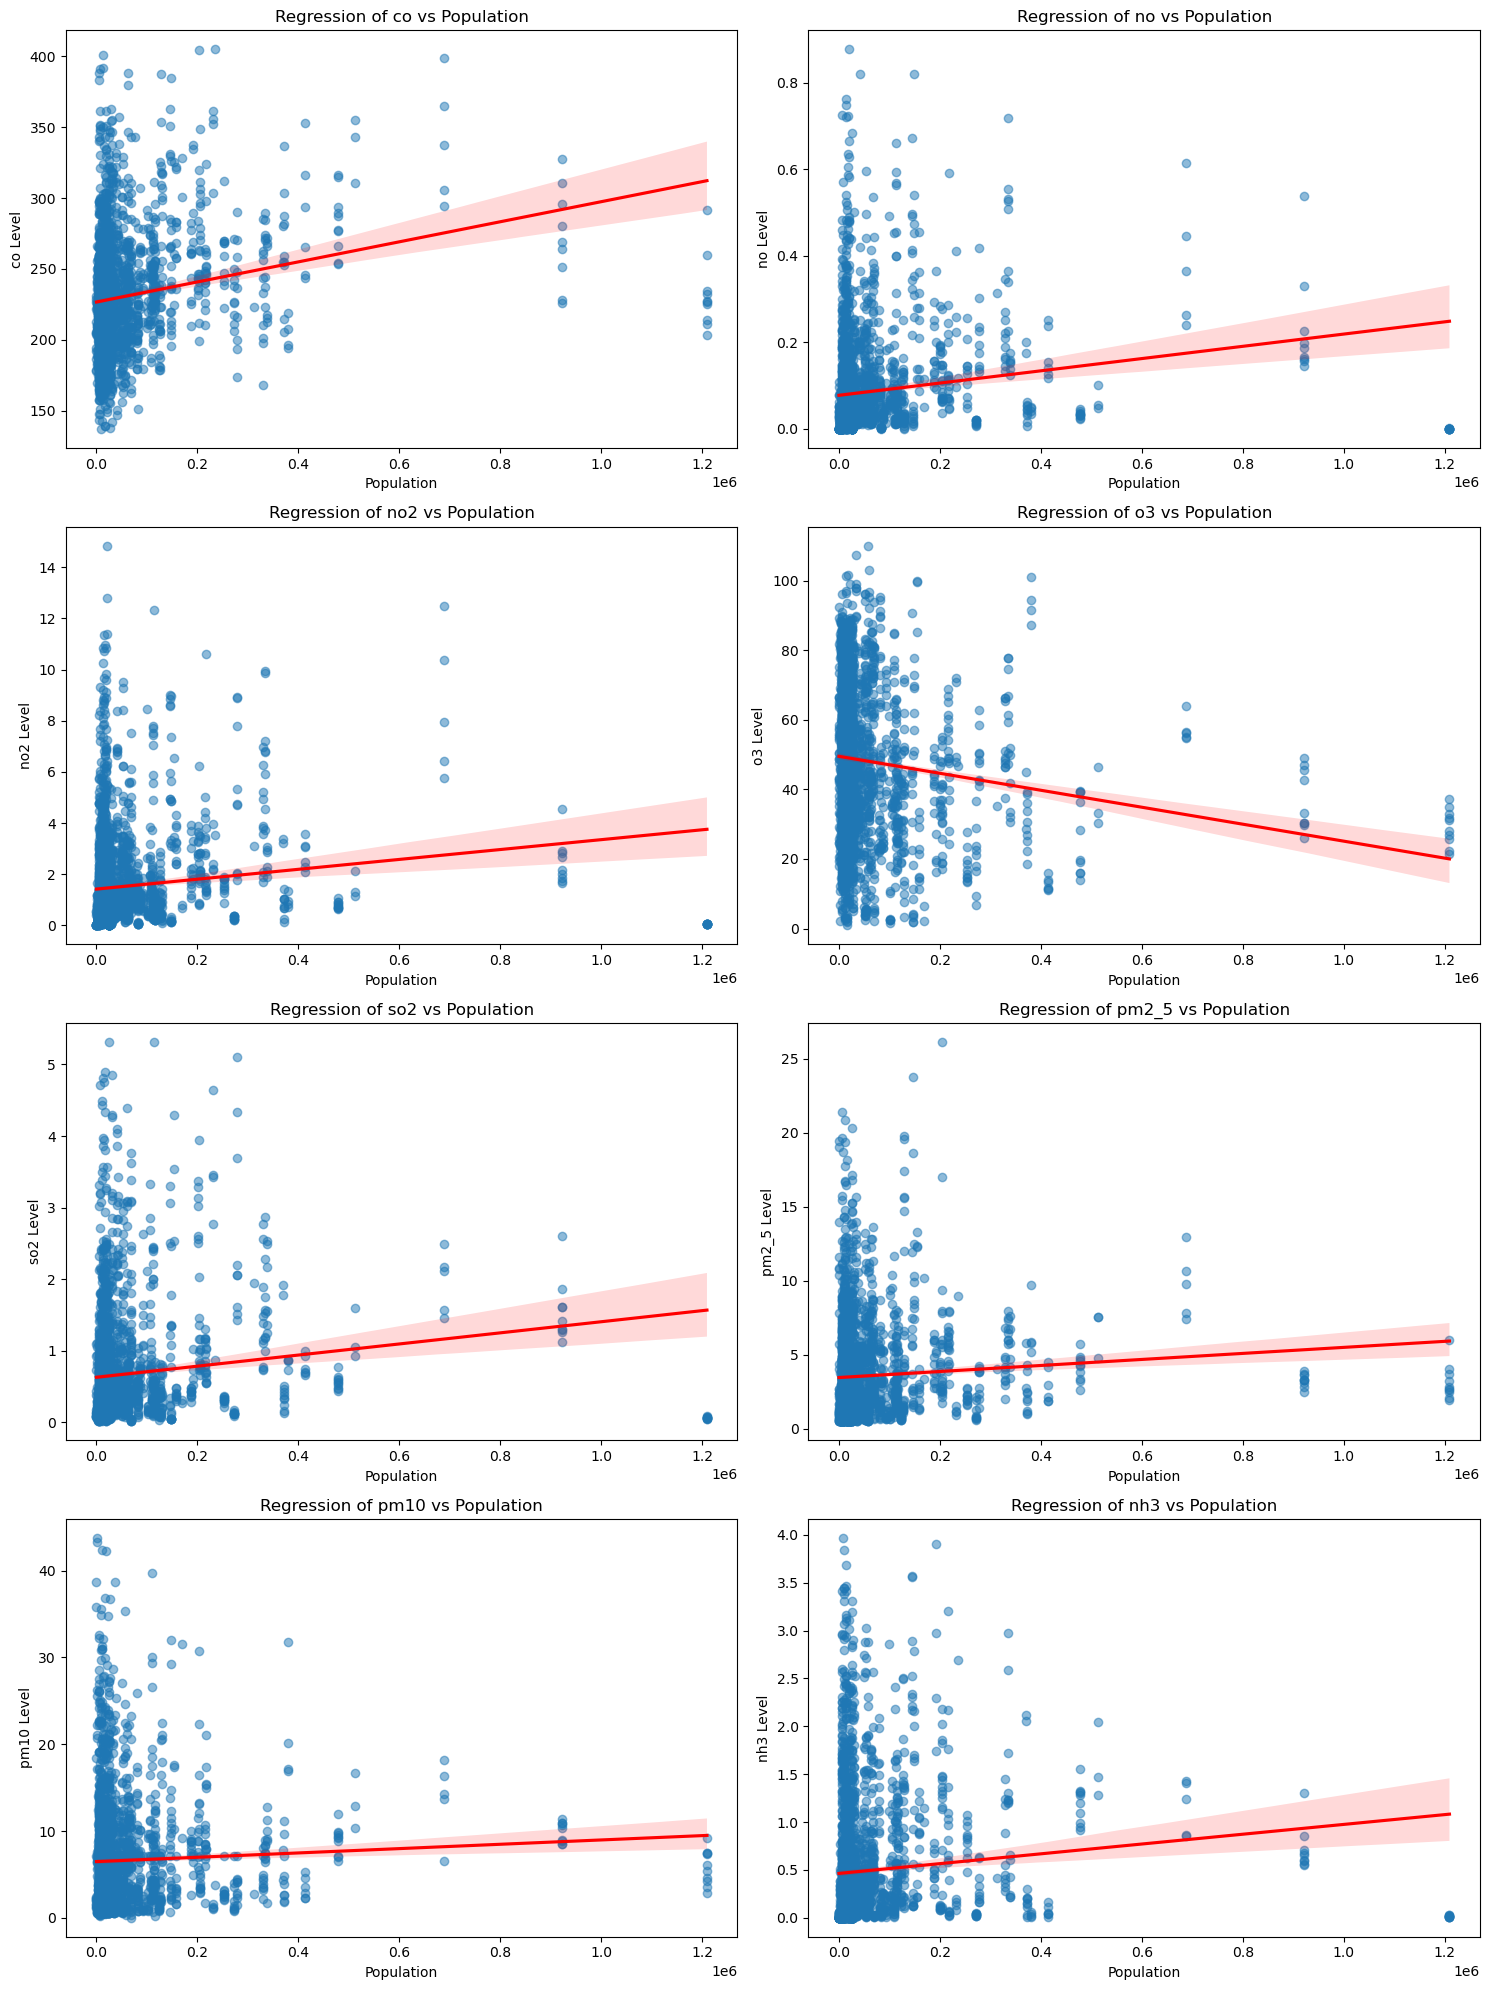

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import numpy as np


# Calculate Spearman correlation coefficients
correlations = {pollutant: spearmanr(filtered_df['population'], filtered_df[pollutant])[0] for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']}
print(correlations)

# Plotting and fitting linear regression for each pollutant
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for i, pollutant in enumerate(pollutants):
    sns.regplot(x='population', y=pollutant, data=filtered_df, ax=axes[i], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axes[i].set_title(f'Regression of {pollutant} vs Population')
    axes[i].set_xlabel('Population')
    axes[i].set_ylabel(f'{pollutant} Level')

plt.tight_layout()
plt.show()


{'co': 0.21030339106596224, 'no': 0.269141673429478, 'no2': 0.23207047567727979, 'o3': -0.1572480153232564, 'so2': 0.24756480673125067, 'pm2_5': 0.19649712492304505, 'pm10': 0.12672150247983202, 'nh3': 0.27184369009263704}


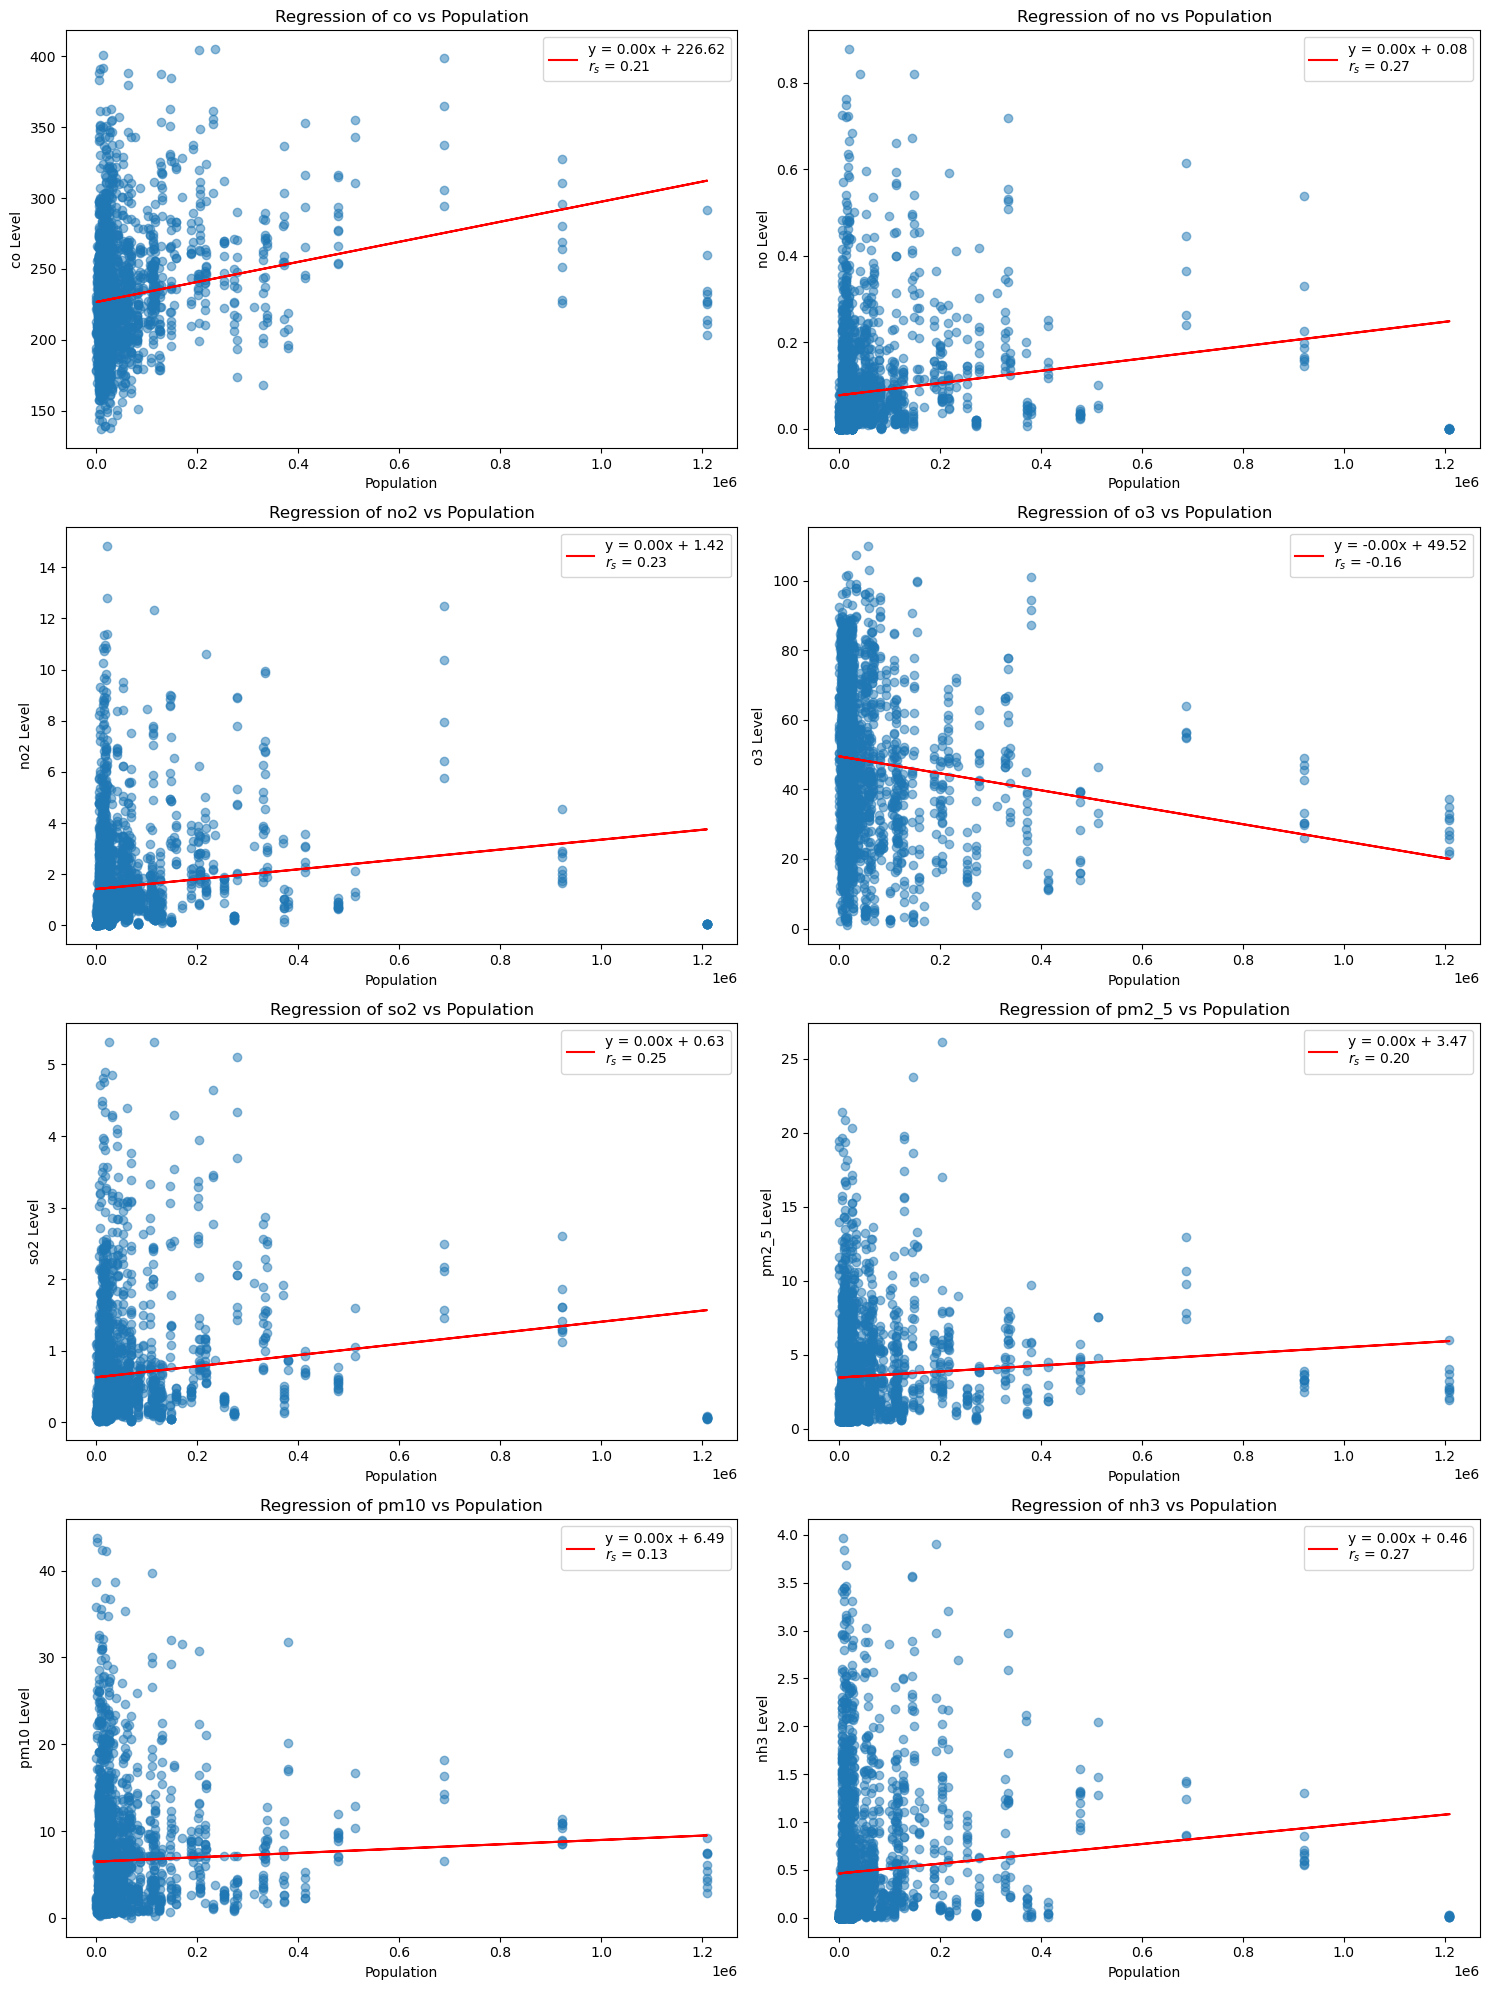

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import numpy as np

# Calculate Spearman correlation coefficients
correlations = {pollutant: spearmanr(filtered_df['population'], filtered_df[pollutant])[0] for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']}
print(correlations)

# Plotting and fitting linear regression for each pollutant
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for i, pollutant in enumerate(pollutants):
    # Extract the data
    x = filtered_df['population'].values.reshape(-1,1)
    y = filtered_df[pollutant].values

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Calculate the trend line
    trendline = model.predict(x)

    # Plot scatter and trend line
    axes[i].scatter(x, y, alpha=0.5)
    axes[i].plot(x, trendline, color='red', label=f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$r_s$ = {correlations[pollutant]:.2f}')

    # Set titles and labels with coefficients
    axes[i].set_title(f'Regression of {pollutant} vs Population')
    axes[i].set_xlabel('Population')
    axes[i].set_ylabel(f'{pollutant} Level')
    axes[i].legend()

plt.tight_layout()
plt.show()


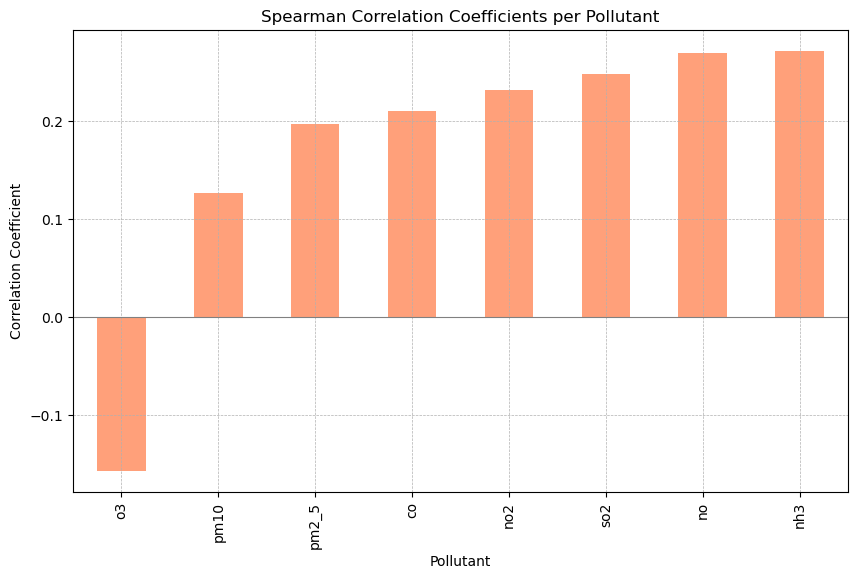

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Assuming 'seasonal_cleaned_combined_no_outliers' is your DataFrame
# Calculate Spearman correlation coefficients
correlations = {pollutant: spearmanr(filtered_df['population'], filtered_df[pollutant])[0] for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']}

# Converting the dictionary to a pandas Series for easy plotting
correlation_series = pd.Series(correlations)

# Plotting the correlation coefficients
plt.figure(figsize=(10, 6))
correlation_series.sort_values().plot(kind='bar', color='lightsalmon')
plt.title('Spearman Correlation Coefficients per Pollutant')
plt.xlabel('Pollutant')
plt.ylabel('Correlation Coefficient')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='gray', linewidth=0.8)  # Adds a horizontal line at zero for reference
plt.show()


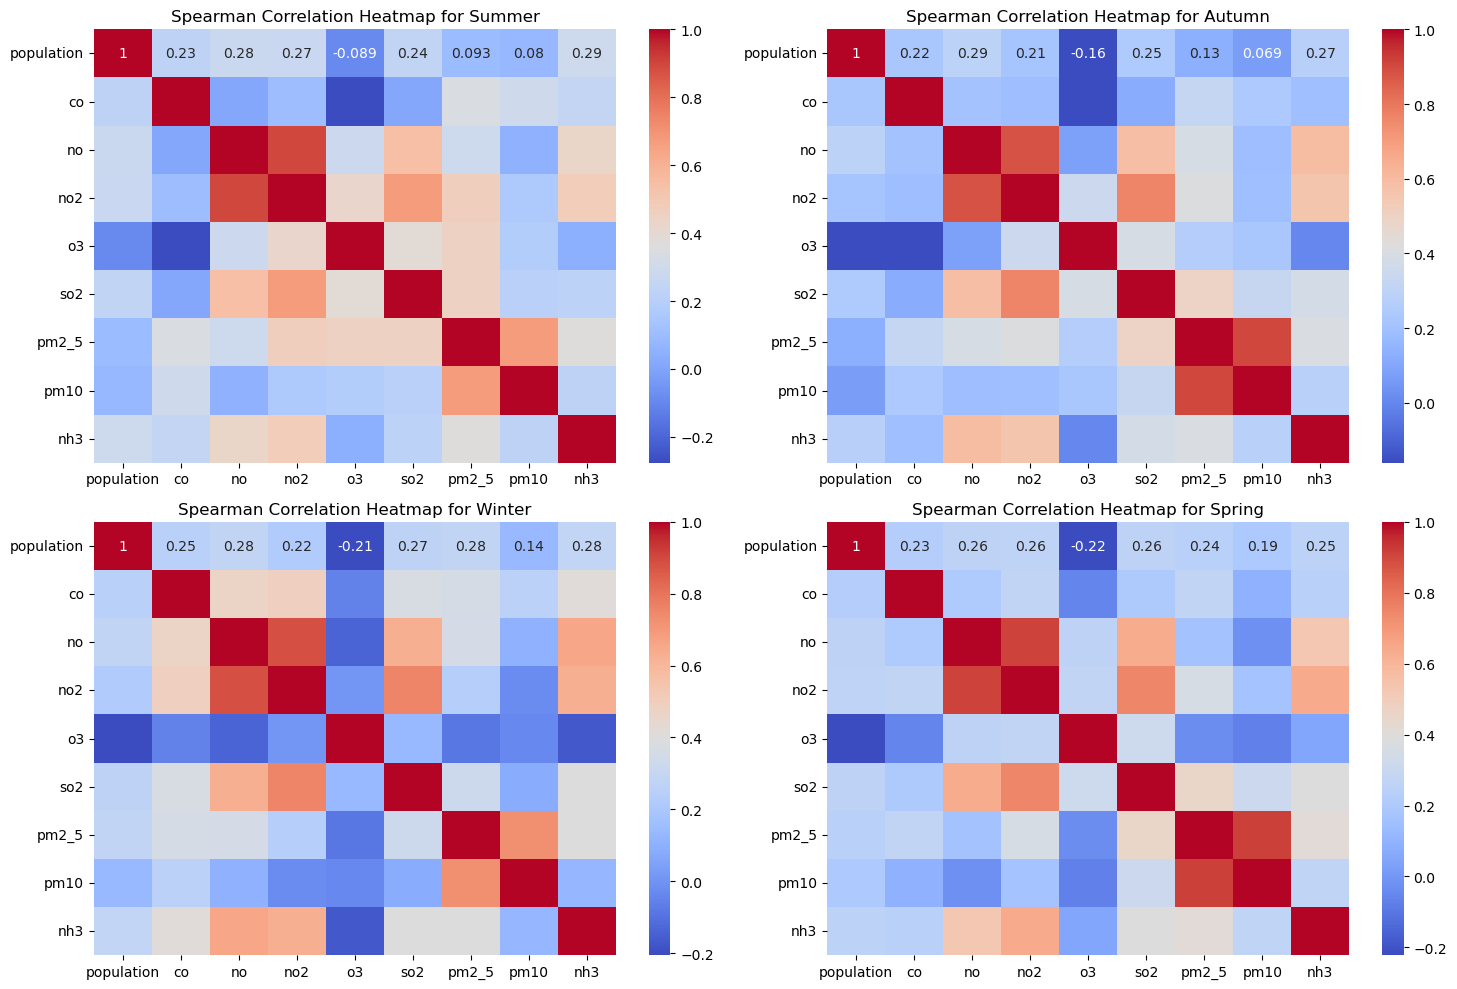

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of seasons, ensuring we only plot four
seasons = filtered_df['Season'].unique()

# Creating a subplot structure in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each season and corresponding subplot axis
for ax, season in zip(axes, seasons):
    # Filter data for the current season
    season_data = filtered_df[filtered_df['Season'] == season]
    
    # Calculate the Spearman correlation matrix for the current season
    correlation_matrix = season_data[['population', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].corr(method='spearman')
    
    # Plot heatmap on the corresponding axis
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title(f'Spearman Correlation Heatmap for {season}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [114]:
# ANOVA - nh3

group0 = filtered_df[filtered_df["Season"] == 'Summer']["nh3"]
group1 = filtered_df[filtered_df["Season"] == 'Autumn']["nh3"]
group2 = filtered_df[filtered_df["Season"] == 'Winter']["nh3"]
group3 = filtered_df[filtered_df["Season"] == 'Spring']["nh3"]

In [115]:
# Perform the ANOVA - nh3
st.f_oneway(group0, group1, group2, group3)

F_onewayResult(statistic=25.752497609279725, pvalue=2.0939045322924985e-16)

In [116]:
# Make sure the output directory exists
os.makedirs(stats_output_dir_season, exist_ok=True)

# Prepare data for ANOVA and plotting
pollutant_data_by_season = {
    pollutant: [
        filtered_df[
            (filtered_df['Season'] == season) & 
            (filtered_df[pollutant].notna())
        ][pollutant].values for season in seasons
    ] for pollutant in pollutants
}

# Prepare a file to log ANOVA results
anova_results_path = os.path.join(stats_output_dir_season, 'ANOVA_results.txt')
with open(anova_results_path, 'w') as results_file:
    results_file.write("ANOVA Results for Pollutants Across Seasons\n")
    results_file.write("-------------------------------------------------\n")

    # Conduct ANOVA for each pollutant and create box plots
    for pollutant, data in pollutant_data_by_season.items():
        # Ensure there's enough data for ANOVA (i.e., at least one season with data)
        if all(len(d) > 1 for d in data):  # Checking that each season has more than one data point
            # Perform ANOVA
            f_stat, p_value = st.f_oneway(*data)
            results_file.write(f"{pollutant.capitalize()}:\n")
            results_file.write(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4e}\n")
            results_file.write("\n")

            # Create and save box plot
            fig, ax = plt.subplots()
            ax.boxplot(data, labels=seasons, showfliers=False)
            ax.set_title(f'{pollutant.capitalize()} Levels Across Seasons')
            ax.set_ylabel('Concentration')
            ax.set_xlabel('Season')
            plt.xticks(rotation=45)
            plt.tight_layout()
            png_file_name = f'{pollutant}_box_plots.png'
            png_file_path = os.path.join(stats_output_dir_season, png_file_name)
            fig.savefig(png_file_path)
            plt.close(fig)  # Close the figure to free up memory

        else:
            results_file.write(f"Not enough data for ANOVA on {pollutant}.\n\n")

In [79]:
#####################################

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your ANOVA results
pollutants = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2_5', 'PM10', 'NH3']
f_statistics = [30.5779, 21.9336, 44.9542, 198.0145, 7.5631, 25.4162, 7.9426, 17.9767]
p_values = [1.5974e-19, 4.4627e-14, 1.5603e-28, 3.4625e-119, 4.8375e-05, 2.8428e-16, 2.8098e-05, 1.3981e-11]

# Convert P-values to a negative log scale to make them more readable on the graph
neg_log_p_values = -np.log10(p_values)


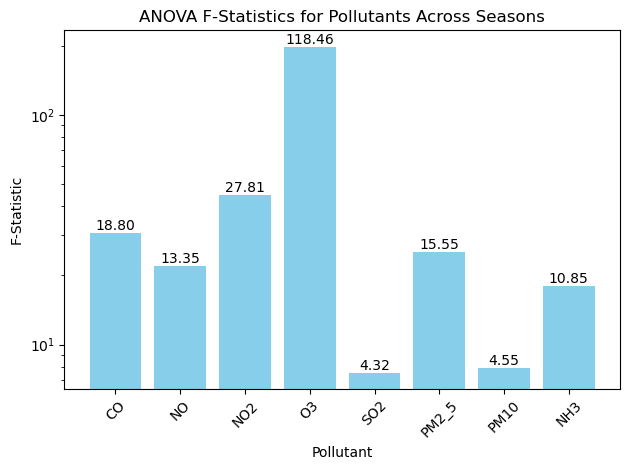

In [118]:
fig, ax = plt.subplots()

# Create a bar chart for the F-statistics
bars = ax.bar(pollutants, f_statistics, color='skyblue')

# Label the chart and axes
ax.set_xlabel('Pollutant')
ax.set_ylabel('F-Statistic')
ax.set_title('ANOVA F-Statistics for Pollutants Across Seasons')
ax.set_yscale('log')  # Use a log scale for better visibility if values vary widely

# Annotate bars with P-values
for bar, p_value in zip(bars, neg_log_p_values):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{p_value:.2f}', va='bottom', ha='center')  # Adjust formatting as needed

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


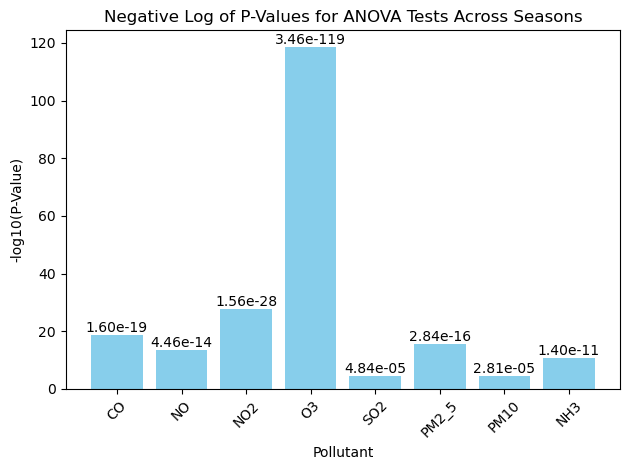

In [119]:
# Data from your ANOVA results (reusing some of the example data)
pollutants = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2_5', 'PM10', 'NH3']
p_values = [1.5974e-19, 4.4627e-14, 1.5603e-28, 3.4625e-119, 4.8375e-05, 2.8428e-16, 2.8098e-05, 1.3981e-11]

# Convert P-values to a negative log scale to make them more readable on the graph
neg_log_p_values = -np.log10(p_values)

# Create the plot
fig, ax = plt.subplots()

# Create a bar chart for the negative log of P-values
bars = ax.bar(pollutants, neg_log_p_values, color='skyblue')

# Label the chart and axes
ax.set_xlabel('Pollutant')
ax.set_ylabel('-log10(P-Value)')
ax.set_title('Negative Log of P-Values for ANOVA Tests Across Seasons')

# Setting y-axis with a log scale may not be necessary here because values are already transformed
# ax.set_yscale('log')

# Annotate bars with original P-values
for bar, p_value in zip(bars, p_values):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{p_value:.2e}', va='bottom', ha='center')  # Adjust formatting as needed

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

Analysis Summary:

1. Carbon Monoxide (CO):
- F-Statistic: 30.5779
- P-Value: 1.5974e-19
- Interpretation: The extremely small P-value suggests there is a highly significant difference in the mean levels of CO across seasons.

2. Nitric Oxide (NO):
- F-Statistic: 21.9336
- P-Value: 4.4627e-14
- Interpretation: There is a significant difference in NO concentrations across seasons, indicated by a very small P-value.

3. Nitrogen Dioxide (NO2):
- F-Statistic: 44.9542
- P-Value: 1.5603e-28
- Interpretation: The results show a highly significant seasonal variation in NO2 levels.

4. Ozone (O3):
- F-Statistic: 198.0145
- P-Value: 3.4625e-119
- Interpretation: Ozone shows the strongest seasonal variation among all pollutants tested, with a strikingly significant difference in means.

5. Sulfur Dioxide (SO2):
- F-Statistic: 7.5631
- P-Value: 4.8375e-05
- Interpretation: There is a significant difference in SO2 concentrations across different seasons, although the effect size (as suggested by the F-statistic) is smaller compared to others like O3 or NO2.

6. Particulate Matter 2.5 (PM2.5):
- F-Statistic: 25.4162
- P-Value: 2.8428e-16
- Interpretation: PM2.5 levels vary significantly across seasons, with a very low P-value indicating strong statistical significance.

7. Particulate Matter 10 (PM10):
- F-Statistic: 7.9426
- P-Value: 2.8098e-05
- Interpretation: There's a significant seasonal variation in PM10 levels, similar to SO2 in terms of statistical weight.

8. Ammonia (NH3):
- F-Statistic: 17.9767
- P-Value: 1.3981e-11
- Interpretation: NH3 concentrations significantly differ across seasons, showing substantial variation.

```Conclusion:```
The ANOVA tests reveal significant differences in the seasonal concentrations of all tested pollutants. The results suggest that factors influencing these pollutants vary across different times of the year, which could be due to changes in weather, heating practices, traffic patterns, or other seasonal activities affecting pollutant levels.

# Spatial Plotting

In [120]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [121]:
coordinates_df = filtered_df.copy()

# Columns of interest for spatial plotting
coordinates_df = coordinates_df[['city', 'country_full', 'latitude', 'longitude', 'Season', 'population', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]

coordinates_df.head(3)

,city,country_full,latitude,longitude,Season,population,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Aasiaat,Kalaallit Nunaat,68.7097,-52.8694,Summer,3134.0,179.718204,0.022079,0.313528,52.637019,0.220574,0.750769,1.410569,0.000000
1,Aasiaat,Kalaallit Nunaat,68.7097,-52.8694,Autumn,3134.0,187.498562,0.001525,0.180261,70.555879,0.093420,0.590055,1.397143,0.000014
2,Aasiaat,Kalaallit Nunaat,68.7097,-52.8694,Winter,3134.0,210.086533,0.000000,0.104167,87.908289,0.120997,0.503884,0.630580,0.000134


In [122]:
# Select only numeric columns for aggregation
numeric_cols = coordinates_df.select_dtypes(include=[np.number]).columns.tolist()

# Specify the columns to group by
grouping_cols = ['city', 'Season']

# Group by 'city' and 'Season', and calculate the mean for numeric columns
city_season_aggregates = coordinates_df.groupby(grouping_cols)[numeric_cols].mean()

# Reset the index if you want 'city' and 'Season' as columns and not as an index
city_season_aggregates = city_season_aggregates.reset_index()

city_season_aggregates.head()  # Shows the first few rows of the aggregated data

,city,Season,latitude,longitude,population,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Aasiaat,Autumn,68.7097,-52.8694,3134.0,222.287983,0.001397,0.151068,74.615141,0.084125,0.569967,1.316548,0.002326
1,Aasiaat,Spring,68.7097,-52.8694,3134.0,236.452492,0.014776,0.217869,81.919817,0.287077,0.535869,0.737457,0.000552
2,Aasiaat,Summer,68.7097,-52.8694,3134.0,200.772970,0.021581,0.325657,50.513853,0.219320,0.757563,1.416170,0.000491
3,Aasiaat,Winter,68.7097,-52.8694,3134.0,230.394107,0.000288,0.113682,83.117876,0.139685,0.523338,2.801522,0.000243
4,Acapulco De Juarez,Spring,16.8636,-99.8825,687608.0,312.344277,0.288954,6.719593,58.494640,1.717790,8.624990,15.368751,1.040931


In [123]:
import geoviews as gv
import geoviews.tile_sources as gts
import hvplot.pandas  # Provides an extension to convert Pandas DataFrame into a Holoviews object
import pandas as pd
import holoviews as hv




In [ ]:
# # Enable Holoviews extension for Jupyter
# hv.extension('bokeh')

# # Select a tile source
# tiles = gv.tile_sources.OSM

# from selenium import webdriver

In [ ]:
# Define the list of pollutants and seasons
# pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
# seasons = ['Winter', 'Spring', 'Autumn', 'Summer']

# # Iterate over pollutants and seasons
# for pollutant in pollutants:
#     for season in seasons:
#         # Filter the DataFrame for the current season and pollutant
#         data = coordinates_df[(coordinates_df['Season'] == season) & (coordinates_df['latitude'] >= -60) & (coordinates_df['latitude'] <=80)]
        
#         # Plotting code with population as bubble size and current pollutant
#         points = data.hvplot.points('longitude', 'latitude', geo=True, color=pollutant, cmap='rainbow', size=(data['population'] * 0.0001), hover_cols=['city', 'Season', pollutant])
        
#         # Set latitude range on the points element
#         points.opts(apply_ranges=True, ylim=(-60, 80))
        
#         plot = tiles * points

#         # Calculate aspect ratio dynamically based on the range of longitude and latitude values
#         lon_range = data['longitude'].max() - data['longitude'].min()
#         lat_range = data['latitude'].max() - data['latitude'].min()
#         aspect_ratio = lat_range / lon_range
        
#         plot.opts(width=2000, height=int(800*aspect_ratio), toolbar='above', title=f"{season} {pollutant} Pollution Levels by City", align='center', margin=(0, 0, 0, 0))
        
#         # Save the plot as a PNG file in the outputs directory
#         output_filename = os.path.join(stats_output_dir_season, f"{pollutant}_{season}.png")
#         hv.save(plot, output_filename, backend='matplotlib')

#         print(f"Plot saved for {pollutant} in {season} season.")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
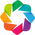

:WMTS   [Longitude,Latitude]

In [124]:

# Enable Holoviews extension for Jupyter
hv.extension('bokeh')

# Select a tile source
tiles = gv.tile_sources.OSM

# Plot the tiles
tiles.opts(width=600, height=400, bgcolor='white')




In [125]:
# Define the list of pollutants and seasons
pollutants = ['co']
seasons = ['Winter']

# Iterate over pollutants and seasons
for pollutant in pollutants:
    for season in seasons:
        # Filter the DataFrame for the current season and pollutant
        data = coordinates_df[(coordinates_df['Season'] == season) & 
                              (coordinates_df['latitude'] >= -60) & 
                              (coordinates_df['latitude'] <= 80)]
        
        # Plotting code with population as bubble size and current pollutant
        co_points = data.hvplot.points('longitude', 'latitude', geo=True, color=pollutant, cmap='rainbow', 
                                       size=(data['population'] * 0.0001), alpha=0.6, legend=True, 
                                       hover_cols=['city', 'Season', pollutant])
        
        # Set latitude range on the points element
        co_points.opts(apply_ranges=True, ylim=(-60, 80))
        
        # Display the plot
        display(co_points)



:Points   [longitude,latitude]   (co,_size,city,Season)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
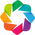

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (co,_size,city,Season)

In [126]:
import geoviews as gv
import geoviews.tile_sources as gts
import hvplot.pandas
import pandas as pd
import holoviews as hv
from IPython.display import display

# Enable Holoviews extension for Jupyter
hv.extension('bokeh')

# Select a tile source
tiles = gv.tile_sources.OSM

# Define the list of pollutants and seasons
pollutants = ['co']
seasons = ['Winter']

# Iterate over pollutants and seasons
for pollutant in pollutants:
    for season in seasons:
        # Filter the DataFrame for the current season and pollutant
        data = coordinates_df[(coordinates_df['Season'] == season) & 
                              (coordinates_df['latitude'] >= -60) & 
                              (coordinates_df['latitude'] <= 80)]
        
        # Plotting code with population as bubble size and current pollutant
        co_points = data.hvplot.points('longitude', 'latitude', geo=True, color=pollutant, cmap='rainbow', 
                                       size=(data['population'] * 0.0001), alpha=0.6, legend=True, 
                                       hover_cols=['city', 'Season', pollutant])
        
        # Set latitude range on the points element
        co_points.opts(apply_ranges=True, ylim=(-60, 80))
        
        # Combine tiles and points
        plot = tiles * co_points
        
        # Display the plot
        display(plot)
